In [ ]:
import pandas as pd

MUJOCO_PATH = "/home/user/experiments/continuous_control/paper_exp/"  # Modify with your path
ATARI_PATH = "/home/user/experiments/atari/experiments/"    # Modify with your path

# Tasks list
mujoco_tasks = [
         "TD3-Walker2d", "TD3-Hopper", "TD3-HalfCheetah",
         "SAC-Walker2d", "SAC-Hopper", "SAC-HalfCheetah",
         "PPO-Walker2d", "PPO-Hopper", "PPO-HalfCheetah"]

atari_tasks = [
    "DQN-Pong", "DQN-SpaceInvaders", "DQN-Enduro", "DQN-Breakout",
    "PPO-Pong", "PPO-SpaceInvaders", "PPO-Enduro", "PPO-Breakout"
]

reward_mujoco_after = []
reward_mujoco_after_est = []
error_mujoco_after = []
error_mujoco_after_est = []

reward_atari_after = []
reward_atari_after_est = []
error_atari_after = []
error_atari_after_est = []

# Helper function to convert values
def convert_value(val):
    """Convert values from CSV to float, handling strings and arrays."""
    if isinstance(val, str):
        # Remove square brackets if present
        val = val.strip('[]')
        # If contains commas (array), take the first value
        if ',' in val:
            val = val.split(',')[0]
    # If it's a numpy array, take the first element
    elif hasattr(val, '__len__') and not isinstance(val, str):
        try:
            val = val[0]
        except:
            pass
    return float(val)

# MuJoCo - only after and after_est
for task in mujoco_tasks:
    algo = task.split('-')[0].lower()
    env_name = task.split('-')[1].lower()
    
    # After
    df = pd.read_csv(f"{MUJOCO_PATH}mujoco_{algo}/{env_name}_final_seed.csv")
    row = df[df['traj_len'] == 500].iloc[0]
    reward_mujoco_after.append(convert_value(row['returns_mean']))
    error_mujoco_after.append(convert_value(row['returns_ci']))
    
    # After Est
    df = pd.read_csv(f"{MUJOCO_PATH}mujoco_{algo}/{env_name}_est.csv")
    row = df[df['traj_len'] == 500].iloc[0]
    reward_mujoco_after_est.append(convert_value(row['returns_mean']))
    error_mujoco_after_est.append(convert_value(row['returns_ci']))

# Atari - after for all, after_est only for Pong
pong_indices = [0, 4]  # DQN-Pong and PPO-Pong

for i, task in enumerate(atari_tasks):
    algo = task.split('-')[0].lower()
    game_name = task.split('-')[1].lower()
    
    # After (for all)
    df = pd.read_csv(f"{ATARI_PATH}{algo}/{game_name}_final_seed.csv")
    row = df[df['traj_len'] == 500].iloc[0]
    reward_atari_after.append(convert_value(row['returns_mean']))
    error_atari_after.append(convert_value(row['returns_ci']))
    
    # After Est (only for Pong)
    if i in pong_indices:
        df = pd.read_csv(f"{ATARI_PATH}{algo}/{game_name}_est.csv")
        row = df[df['traj_len'] == 500].iloc[0]
        reward_atari_after_est.append(convert_value(row['returns_mean']))
        error_atari_after_est.append(convert_value(row['returns_ci']))
    else:
        # For other games, use 0 (or None if you prefer)
        reward_atari_after_est.append(0)
        error_atari_after_est.append(0)


reward_atari_after[0] = reward_atari_after[0]*10
reward_atari_after[4] = reward_atari_after[4]*10
error_atari_after[0] = error_atari_after[0]*10
error_atari_after[4] = error_atari_after[4]*10

reward_atari_after_est[0] = reward_atari_after_est[0]*10
reward_atari_after_est[4] = reward_atari_after_est[4]*10

error_atari_after_est[0] = error_atari_after_est[0]*10
error_atari_after_est[4] = error_atari_after_est[4]*10

# Print results
print("reward_mujoco_after =", reward_mujoco_after)
print("reward_mujoco_after_est =", reward_mujoco_after_est)
print("error_mujoco_after =", error_mujoco_after)
print("error_mujoco_after_est =", error_mujoco_after_est)

print("\nreward_atari_after =", reward_atari_after)
print("reward_atari_after_est =", reward_atari_after_est)
print("error_atari_after =", error_atari_after)
print("error_atari_after_est =", error_atari_after_est)

reward_mujoco_after = [4629.716874511719, 3247.1498347167967, 7192.015931373596, 3421.398922163009, 2241.404971679688, 8418.230240234376, 2634.579266433716, 2580.612405578613, 5172.569009090424]
reward_mujoco_after_est = [4256.92848336792, 2545.2360297851565, 6613.060802604676, 2962.3006371307374, 1626.6512924804688, 7069.249819335938, 2073.518548095703, 1201.8006968383788, 3850.128921510696]
error_mujoco_after = [20.644333837837312, 35.22875456464921, 129.66754635887736, 73.11580767837059, 67.88174363413737, 62.424848186431085, 50.80507424, 17.69623912, 16.9093902]
error_mujoco_after_est = [52.2123747649386, 53.33976134419067, 89.22595093685999, 78.92517158804111, 49.25585151516904, 36.4391026149222, 84.56748689, 33.62839197, 40.99230669]

reward_atari_after = [187.62, 630.525, 862.37, 269.14, 198.25, 1156.775, 1181.205, 195.755]
reward_atari_after_est = [86.85000000000001, 0, 0, 0, 170.39999999999998, 0, 0, 0]
error_atari_after = [3.4188138, 24.07144641, 26.4482676, 12.52997604, 2.36

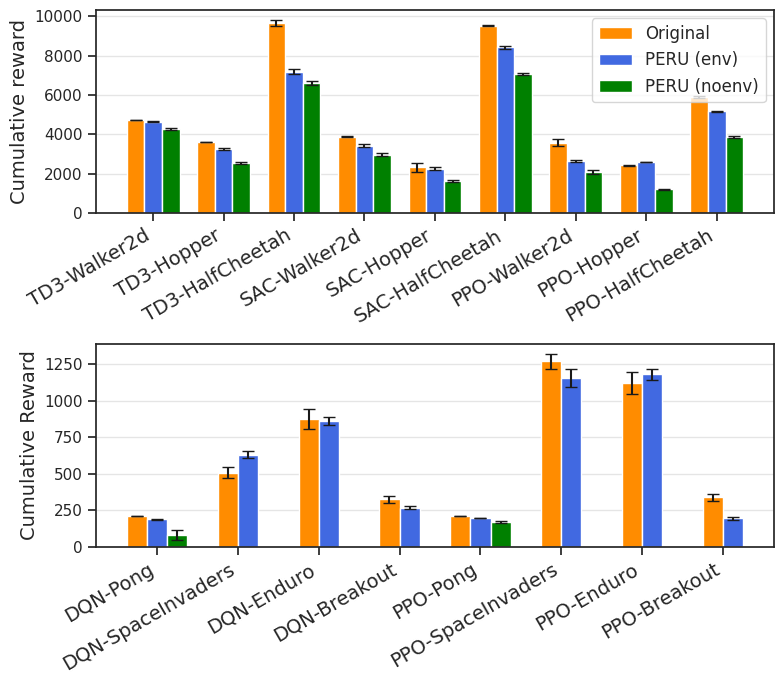

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set seaborn style
sns.set_theme(style="ticks")



# MuJoCo data
reward_mujoco_before =       [4730, 3606, 9669, 3870, 2315, 9531, 3573, 2410, 5896]
error_mujoco_before    =     [10, 1, 166, 23, 227, 20, 162, 2, 46]

# Atari data
reward_atari_before = [21*10, 509, 875, 326, 21*10, 1270, 1122, 339 ]
reward_atari_after_est = [8.2 * 10, 0, 0, 0, 17*10,0,0,0]
error_atari_before = [0, 36.7, 69.5, 23.8, 0, 53.7, 76.3, 22.6]
error_atari_after_est = [3.4*10, 0,0,0,0.5*10,0,0,0]

# Create DataFrame for MuJoCo
mujoco_data = []
for i, task in enumerate(mujoco_tasks):
    mujoco_data.extend([
        {'Task': task, 'Method': 'Original', 'Reward': reward_mujoco_before[i], 'Error': error_mujoco_before[i]},
        {'Task': task, 'Method': 'PERU (env)', 'Reward': reward_mujoco_after[i], 'Error': error_mujoco_after[i]},
        {'Task': task, 'Method': 'PERU (noenv)', 'Reward': reward_mujoco_after_est[i], 'Error': error_mujoco_after_est[i]}
    ])
df_mujoco = pd.DataFrame(mujoco_data)

# Create DataFrame for Atari (more complex due to Pong)
atari_data = []
pong_indices = [0, 4]  # DQN-Pong and PPO-Pong

for i, task in enumerate(atari_tasks):
    atari_data.append({'Task': task, 'Method': 'Original', 'Reward': reward_atari_before[i], 'Error': error_atari_before[i]})
    atari_data.append({'Task': task, 'Method': 'PERU (env)', 'Reward': reward_atari_after[i], 'Error': error_atari_after[i]})
    if i in pong_indices:
        atari_data.append({'Task': task, 'Method': 'PERU (noenv)', 'Reward': reward_atari_after_est[i], 'Error': error_atari_after_est[i]})

df_atari = pd.DataFrame(atari_data)

# Create figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7))

# Custom colors
palette = {
    'Original': 'darkorange',
    'PERU (env)': 'royalblue',
    'PERU (noenv)': 'green'
}

# First subplot - MuJoCo
# Use the same manual approach to have consistent colors
ax1.clear()
x1 = np.arange(len(mujoco_tasks))
width = 0.25

for i in range(len(mujoco_tasks)):
    ax1.bar(i - width, reward_mujoco_before[i], width, 
            yerr=error_mujoco_before[i], capsize=4, color=palette['Original'],
            label='Original' if i == 0 else "")
    ax1.bar(i, reward_mujoco_after[i], width, 
            yerr=error_mujoco_after[i], capsize=4, color=palette['PERU (env)'],
            label='PERU (env)' if i == 0 else "")
    ax1.bar(i + width, reward_mujoco_after_est[i], width, 
            yerr=error_mujoco_after_est[i], capsize=4, color=palette['PERU (noenv)'],
            label='PERU (noenv)' if i == 0 else "")

ax1.set_xticks(x1)
ax1.set_xticklabels(mujoco_tasks, rotation=30, ha='right', fontsize=14)

ax1.set_ylabel('Cumulative reward', fontsize=14)
ax1.legend(fontsize=12)

# Second subplot - Atari (more complex)
# For Atari we need to manually handle positioning because some tasks have 2 bars and others 3
ax2.clear()

# Manual plot to handle the difference between Pong and other tasks
x2 = np.arange(len(atari_tasks))
width = 0.25

for i in range(len(atari_tasks)):
    if i in pong_indices:
        # For Pong: 3 bars
        ax2.bar(i - width, reward_atari_before[i], width, 
                yerr=error_atari_before[i], capsize=4, color=palette['Original'],
                label='Original' if i == 0 else "")
        ax2.bar(i, reward_atari_after[i], width, 
                yerr=error_atari_after[i], capsize=4, color=palette['PERU (env)'],
                label='PERU (env)' if i == 0 else "")
        ax2.bar(i + width, reward_atari_after_est[i], width, 
                yerr=error_atari_after_est[i], capsize=4, color=palette['PERU (noenv)'],
                label='PERU (noenv)' if i == 0 else "")
    else:
        # For others: 2 centered bars
        ax2.bar(i - width/2, reward_atari_before[i], width, 
                yerr=error_atari_before[i], capsize=4, color=palette['Original'])
        ax2.bar(i + width/2, reward_atari_after[i], width, 
                yerr=error_atari_after[i], capsize=4, color=palette['PERU (env)'])

# Atari subplot settings
ax2.set_xticks(x2)
ax2.set_xticklabels(atari_tasks, rotation=30, ha='right', fontsize=14)
ax2.set_ylabel('Cumulative Reward', fontsize=14)

# Apply seaborn style to second subplot
sns.despine(ax=ax2, top=False, right=False)  # Keep all borders

# Keep all borders for first subplot too
sns.despine(ax=ax1, top=False, right=False)

# Set horizontal grid only for both subplots
ax1.grid(True, axis='y', alpha=0.5)
ax1.grid(False, axis='x')
ax2.grid(True, axis='y', alpha=0.5)
ax2.grid(False, axis='x')

plt.tight_layout()
plt.savefig('./reward_double.pdf', format='pdf', bbox_inches="tight")
plt.show()

In [5]:
from __future__ import annotations

import argparse
import os
from pathlib import Path
from typing import Dict, Tuple

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------------------------------------------------------
# Configuration ----------------------------------------------------------------
# ----------------------------------------------------------------------------
TASKS = ["Walker2d", "Hopper", "HalfCheetah"]
ALGS = ["TD3", "SAC", "PPO"]
# Sub‑folder prefix inside the paper_exp directory.
FOLDER_TEMPLATE = "mujoco_{alg}"
FILE_TEMPLATE = "{task}.csv"  # task names already lowercase in template
# ----------------------------------------------------------------------------


def parse_args() -> argparse.Namespace:
    parser = argparse.ArgumentParser(description="Plot Mujoco retain/forget heatmaps from CSVs.")
    parser.add_argument(
        "-r",
        "--root",
        type=Path,
        default=Path("paper_exp"),
        help="Root directory that contains mujoco_{td3,sac,ppo} sub‑directories.",
    )
    parser.add_argument(
        "--dpi", type=int, default=300, help="Resolution of the saved PNG images."
    )
    return parser.parse_args()


def load_csvs(root: Path) -> Dict[Tuple[str, str], pd.DataFrame]:
    """Load every CSV into a dictionary keyed by (ALG, TASK)."""
    dfs: Dict[Tuple[str, str], pd.DataFrame] = {}
    for alg in ALGS:
        folder = root / FOLDER_TEMPLATE.format(alg=alg.lower())
        for task in TASKS:
            csv_path = folder / FILE_TEMPLATE.format(task=task.lower())
            if not csv_path.exists():
                raise FileNotFoundError(f"Expected file not found: {csv_path}")
            df = pd.read_csv(csv_path)
            dfs[(alg, task)] = df
    return dfs


def get_traj_lens(dfs: Dict[Tuple[str, str], pd.DataFrame]) -> np.ndarray:
    """Assumes all CSVs share the same traj_len set; returns sorted unique values."""
    # Take the set from the first DF
    sample_df = next(iter(dfs.values()))
    traj_lens = np.asarray(sorted(sample_df["traj_len"].unique()))
    return traj_lens


def collect_matrices(
    dfs: Dict[Tuple[str, str], pd.DataFrame], traj_len: int
) -> Tuple[np.ndarray, np.ndarray]:
    """Create retain and forget matrices (TASK × ALG) for a given traj_len."""
    retain = np.full((len(TASKS), len(ALGS)), np.nan)
    forget = np.full_like(retain, np.nan)

    for i, task in enumerate(TASKS):
        for j, alg in enumerate(ALGS):
            df = dfs[(alg, task)]
            row = df.loc[df["traj_len"] == traj_len]
            if row.empty:
                continue  # leave NaN so heatmap shows missing value
            retain[i, j] = row["avg_retain_target_mean_distance"].values[0]
            forget[i, j] = row["avg_forget_target_mean_distance"].values[0]
    return retain, forget


def plot_heatmap(matrix: np.ndarray, title: str, filename: Path, dpi: int) -> None:
    """Utility wrapper for a single heatmap figure."""
    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(matrix, aspect="auto")

    ax.set_xticks(np.arange(len(ALGS)))
    ax.set_xticklabels(ALGS)
    ax.set_yticks(np.arange(len(TASKS)))
    ax.set_yticklabels(TASKS)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    ax.set_title(title)

    fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    plt.tight_layout()
    fig.savefig(filename, dpi=dpi)
    plt.close(fig)



In [1]:
import pandas as pd
from pathlib import Path

root = Path("/home/user/experiments/continuous_control/paper_exp/")

TASKS = ["walker2d", "hopper", "halfcheetah"]
ALGS  = ["td3", "sac", "ppo"]

frames = []
for alg in ALGS:
    for task in TASKS:
        csv = root / f"mujoco_{alg}/{task}_final_seed.csv"
        df  = pd.read_csv(csv)
        df["Algorithm"] = alg.upper()
        df["Task"]      = task.title()
        frames.append(df)

full = pd.concat(frames, ignore_index=True)

full["avg_retain_target_mean_distance"] = (1 - full["avg_retain_target_mean_distance"]) * 100
full["avg_forget_target_mean_distance"] = (1 - full["avg_forget_target_mean_distance"]) * 100

pivot_len = (
    full
    .pivot_table(
        index=["traj_len", "Task"],
        columns="Algorithm",
        values=["avg_retain_target_mean_distance", "avg_forget_target_mean_distance"]
    )
    .sort_index(level=0)  
)

# visualizzazione
pivot_len.style.format("{:.2f}%")

In [2]:
import pandas as pd
from pathlib import Path

root = Path("/home/user/experiments/continuous_control/paper_exp/atari/experiments/")

TASKS = ["pong", "spaceinvaders", "enduro", "breakout"]
ALGS  = ["dqn","ppo"]

frames = []
for alg in ALGS:
    for task in TASKS:
        csv = root / f"{alg}/{task}_final_seed.csv"
        df  = pd.read_csv(csv)
        df["Algorithm"] = alg.upper()
        df["Task"]      = task.title()
        frames.append(df)

full = pd.concat(frames, ignore_index=True)

full["avg_retain_target_mean_distance"] = (1 - full["avg_retain_target_mean_distance"]) * 100
full["avg_forget_target_mean_distance"] = (1 - full["avg_forget_target_mean_distance"]) * 100

pivot_len = (
    full
    .pivot_table(
        index=["traj_len", "Task"],
        columns="Algorithm",
        values=["avg_retain_target_mean_distance", "avg_forget_target_mean_distance"]
    )
    .sort_index(level=0)  # ordina per traj_len
)

# visualizzazione
pivot_len.style.format("{:.2f}%")

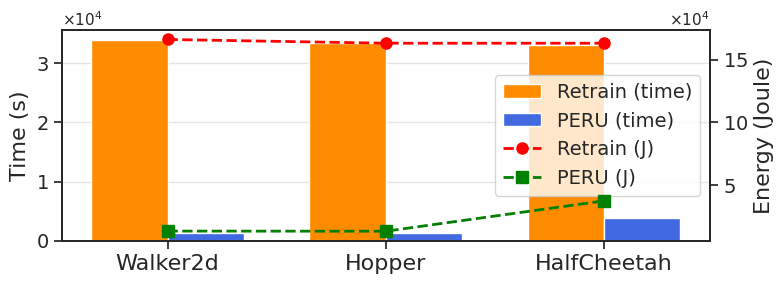

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.ticker import ScalarFormatter
# Set seaborn style
sns.set_theme(style="ticks")

# Data
tasks = ["Walker2d", "Hopper", "HalfCheetah"]

time_retrain = [33_900, 33_300, 33_009]
time_unlearn = [1380, 1368, 3820]       

energy_retrain = [166_000, 163_000, 163_000]   
energy_unlearn = [13_300, 13_200, 37_400]

# Create DataFrame to organize data
time_data = []
for i, task in enumerate(tasks):
    time_data.append({'Task': task, 'Method': 'Retrain (time)', 'Time': time_retrain[i]})
    time_data.append({'Task': task, 'Method': 'PERU (time)', 'Time': time_unlearn[i]})

df_time = pd.DataFrame(time_data)

# Create the plot
fig, ax1 = plt.subplots(figsize=(8, 3))

# Bar plot for time
x = np.arange(len(tasks))
width = 0.35

# Use matplotlib bar to maintain color control
ax1.bar(x - width/2, time_retrain, width, label='Retrain (time)', color='darkorange')
ax1.bar(x + width/2, time_unlearn, width, label='PERU (time)', color='royalblue')

ax1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax1.ticklabel_format(style='sci', axis='y', scilimits=(4,4))
ax1.set_ylabel('Time (s)', fontsize=16)

ax1.set_xticks(x)
ax1.set_xticklabels(tasks, fontsize=16)

# Second axis for energy in Joules
ax2 = ax1.twinx()

# Line plot for energy
ax2.plot(x, energy_retrain, marker='o', linestyle='--', color='red', 
         label='Retrain (J)', linewidth=2, markersize=8)
ax2.plot(x, energy_unlearn, marker='s', linestyle='--', color='green', 
         label='PERU (J)', linewidth=2, markersize=8)
ax2.set_ylabel('Energy (Joule)', fontsize=16)

ax2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax2.ticklabel_format(style='sci', axis='y', scilimits=(4,4))

# Set font size for second axis ticks
ax2.tick_params(axis='y', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)

# Combine legends
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='center right', fontsize=14)

# Horizontal grid only
ax1.grid(True, axis='y', alpha=0.5)
ax1.grid(False, axis='x')
ax1.set_axisbelow(True)  # Put grid under bars
ax2.grid(False)


# Keep all borders
sns.despine(ax=ax1, top=False, right=False)

plt.tight_layout()
plt.savefig('./retrain_vs_PERU.pdf', format='pdf', bbox_inches="tight")
plt.show()

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def load_results(filepath):
    """Load experimental results from JSON file"""
    with open(filepath, 'r') as f:
        return json.load(f)

def aggregate_by_param(data, param_name, fixed_params=None):
    """Aggregate results by a specific parameter"""
    results = defaultdict(list)
    
    for result in data:
        hp = result['hyperparams']
        
        # Check if fixed parameters match (if specified)
        if fixed_params:
            skip = False
            for key, val in fixed_params.items():
                if hp[key] != val:
                    skip = True
                    break
            if skip:
                continue
        
        # Get parameter value based on param_name
        param_val = hp[param_name]
        
        # Store metrics
        results[param_val].append({
            'forget_acc': result['metrics1']['forget_accuracy'],
            'retain_acc': result['metrics1']['retain_accuracy'],
            'reward': result['metrics2']['mean']
        })
    
    # Debug: print how many data points we have
    if len(results) == 0:
        print(f"WARNING: No data found for param {param_name} with fixed params {fixed_params}")
    else:
        print(f"Found {len(results)} unique values for {param_name}")
    
    # Calculate means and stds
    final_results = {}
    for param_val, runs in results.items():
        forget_accs = [r['forget_acc'] for r in runs]
        retain_accs = [r['retain_acc'] for r in runs]
        rewards = [r['reward'] for r in runs]
        
        final_results[param_val] = {
            'forget_acc_mean': np.mean(forget_accs),
            'forget_acc_std': np.std(forget_accs),
            'retain_acc_mean': np.mean(retain_accs),
            'retain_acc_std': np.std(retain_accs),
            'reward_mean': np.mean(rewards),
            'reward_std': np.std(rewards)
        }
    
    return final_results

# Configuration for fixed parameters per task
FIXED_PARAMS = {
    'hopper': {
        'lambda2_study': {'lambda1': 1, 'retain': 0.5, 'retain_dim': 200},
        'retain_size_study': {'lambda1': 1, 'lambda2': 2.5, 'retain': 0.5},
        'distance_study': {'lambda1': 1, 'lambda2': 2.5, 'retain_dim': 200}
    },
    'halfcheetah': {
        'lambda2_study': {'lambda1': 1, 'retain': 1.5, 'retain_dim': 300},      # Different retain_dim
        'retain_size_study': {'lambda1': 1, 'lambda2': 2.5, 'retain': 1.5},    # Different lambda2 and retain
        'distance_study': {'lambda1': 1, 'lambda2': 2.5, 'retain_dim': 300}     # Different values
    },
    'walker2d': {
        'lambda2_study': {'lambda1': 1, 'retain': 1.5, 'retain_dim': 150},     
        'retain_size_study': {'lambda1': 1, 'lambda2': 5, 'retain': 1.5},    
        'distance_study': {'lambda1': 1, 'lambda2': 5, 'retain_dim': 150}     
    }
}

def plot_lambda2_effect(hopper_data, halfcheetah_data, walker2d_data=None):
    """Plot effect of lambda2 on accuracies and reward"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Prepare datasets and colors
    datasets = [
        (hopper_data, 'Hopper', 'blue', 'red', FIXED_PARAMS['hopper']['lambda2_study']),
        (halfcheetah_data, 'HalfCheetah', 'darkgreen', 'orange', FIXED_PARAMS['halfcheetah']['lambda2_study'])
    ]
    if walker2d_data is not None:
        datasets.append((walker2d_data, 'Walker2d', 'purple', 'brown', FIXED_PARAMS['walker2d']['lambda2_study']))
    
    for data, env_name, color_f, color_r, fixed in datasets:
        results = aggregate_by_param(data, 'lambda2', fixed)
        
        # Sort by lambda2
        lambda2_vals = sorted(results.keys())
        
        # Extract metrics
        forget_means = [results[l]['forget_acc_mean'] for l in lambda2_vals]
        forget_stds = [results[l]['forget_acc_std'] for l in lambda2_vals]
        retain_means = [results[l]['retain_acc_mean'] for l in lambda2_vals]
        retain_stds = [results[l]['retain_acc_std'] for l in lambda2_vals]
        reward_means = [results[l]['reward_mean'] for l in lambda2_vals]
        reward_stds = [results[l]['reward_std'] for l in lambda2_vals]
        
        # Plot accuracies
        ax1.errorbar(lambda2_vals, forget_means, yerr=forget_stds, 
                    label=f'{env_name} Forget', marker='o', color=color_f, capsize=5)
        ax1.errorbar(lambda2_vals, retain_means, yerr=retain_stds, 
                    label=f'{env_name} Retain', marker='s', color=color_r, capsize=5)
        
        # Plot rewards
        ax2.errorbar(lambda2_vals, reward_means, yerr=reward_stds, 
                    label=env_name, marker='o', capsize=5)
    
    ax1.set_xlabel('λ2 (Retain Weight)')
    ax1.set_ylabel('Accuracy (%)')
    ax1.set_title('Forget/Retain Accuracy vs λ2')
    ax1.legend(ncol=2)
    ax1.grid(True, alpha=0.3)
    
    ax2.set_xlabel('λ2 (Retain Weight)')
    ax2.set_ylabel('Mean Reward')
    ax2.set_title('Cumulative Reward vs λ2')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('ablation_lambda2.pdf', dpi=300, bbox_inches='tight')
    plt.show()

def plot_retain_size_effect(hopper_data, halfcheetah_data, walker2d_data=None):
    """Plot effect of retain set size on accuracies and reward"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Prepare datasets and colors
    datasets = [
        (hopper_data, 'Hopper', 'blue', 'red', FIXED_PARAMS['hopper']['retain_size_study']),
        (halfcheetah_data, 'HalfCheetah', 'darkgreen', 'orange', FIXED_PARAMS['halfcheetah']['retain_size_study'])
    ]
    if walker2d_data is not None:
        datasets.append((walker2d_data, 'Walker2d', 'purple', 'brown', FIXED_PARAMS['walker2d']['retain_size_study']))
    
    for data, env_name, color_f, color_r, fixed in datasets:
        results = aggregate_by_param(data, 'retain_dim', fixed)
        
        # Sort by retain size
        size_vals = sorted(results.keys())
        
        # Extract metrics
        forget_means = [results[s]['forget_acc_mean'] for s in size_vals]
        forget_stds = [results[s]['forget_acc_std'] for s in size_vals]
        retain_means = [results[s]['retain_acc_mean'] for s in size_vals]
        retain_stds = [results[s]['retain_acc_std'] for s in size_vals]
        reward_means = [results[s]['reward_mean'] for s in size_vals]
        reward_stds = [results[s]['reward_std'] for s in size_vals]
        
        # Plot accuracies
        ax1.errorbar(size_vals, forget_means, yerr=forget_stds, 
                    label=f'{env_name} Forget', marker='o', color=color_f, capsize=5)
        ax1.errorbar(size_vals, retain_means, yerr=retain_stds, 
                    label=f'{env_name} Retain', marker='s', color=color_r, capsize=5)
        
        # Plot rewards
        ax2.errorbar(size_vals, reward_means, yerr=reward_stds, 
                    label=env_name, marker='o', capsize=5)
    
    ax1.set_xlabel('Retain Set Size')
    ax1.set_ylabel('Accuracy (%)')
    ax1.set_title('Forget/Retain Accuracy vs Retain Set Size')
    ax1.legend(ncol=2)
    ax1.grid(True, alpha=0.3)
    ax1.set_xscale('log')
    
    ax2.set_xlabel('Retain Set Size')
    ax2.set_ylabel('Mean Reward')
    ax2.set_title('Cumulative Reward vs Retain Set Size')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.set_xscale('log')
    
    plt.tight_layout()
    plt.savefig('ablation_retain_size.pdf', dpi=300, bbox_inches='tight')
    plt.show()

def plot_distance_effect(hopper_data, halfcheetah_data, walker2d_data=None):
    """Plot effect of minimum distance on accuracies and reward"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Prepare datasets and colors
    datasets = [
        (hopper_data, 'Hopper', 'blue', 'red', FIXED_PARAMS['hopper']['distance_study']),
        (halfcheetah_data, 'HalfCheetah', 'darkgreen', 'orange', FIXED_PARAMS['halfcheetah']['distance_study'])
    ]
    if walker2d_data is not None:
        datasets.append((walker2d_data, 'Walker2d', 'purple', 'brown', FIXED_PARAMS['walker2d']['distance_study']))
    
    for data, env_name, color_f, color_r, fixed in datasets:
        results = aggregate_by_param(data, 'retain', fixed)
        
        # Sort by distance
        dist_vals = sorted(results.keys())
        
        # Extract metrics
        forget_means = [results[d]['forget_acc_mean'] for d in dist_vals]
        forget_stds = [results[d]['forget_acc_std'] for d in dist_vals]
        retain_means = [results[d]['retain_acc_mean'] for d in dist_vals]
        retain_stds = [results[d]['retain_acc_std'] for d in dist_vals]
        reward_means = [results[d]['reward_mean'] for d in dist_vals]
        reward_stds = [results[d]['reward_std'] for d in dist_vals]
        
        # Plot accuracies
        ax1.errorbar(dist_vals, forget_means, yerr=forget_stds, 
                    label=f'{env_name} Forget', marker='o', color=color_f, capsize=5)
        ax1.errorbar(dist_vals, retain_means, yerr=retain_stds, 
                    label=f'{env_name} Retain', marker='s', color=color_r, capsize=5)
        
        # Plot rewards
        ax2.errorbar(dist_vals, reward_means, yerr=reward_stds, 
                    label=env_name, marker='o', capsize=5)
    
    ax1.set_xlabel('Minimum Distance Threshold (dmin)')
    ax1.set_ylabel('Accuracy (%)')
    ax1.set_title('Forget/Retain Accuracy vs Distance Threshold')
    ax1.legend(ncol=2)
    ax1.grid(True, alpha=0.3)
    
    ax2.set_xlabel('Minimum Distance Threshold (dmin)')
    ax2.set_ylabel('Mean Reward')
    ax2.set_title('Cumulative Reward vs Distance Threshold')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('ablation_distance.pdf', dpi=300, bbox_inches='tight')
    plt.show()


In [5]:

import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import pandas as pd
from scipy import stats
from matplotlib.ticker import ScalarFormatter
from matplotlib.lines import Line2D

# Set style
sns.set_style("ticks")

def load_results(filepath):
    """Load experimental results from JSON file"""
    with open(filepath, 'r') as f:
        return json.load(f)

def aggregate_by_param(data, param_name, fixed_params=None):
    """Aggregate results by a specific parameter"""
    results = defaultdict(list)
    
    for result in data:
        hp = result['hyperparams']
        
        # Check if fixed parameters match (if specified)
        if fixed_params:
            skip = False
            for key, val in fixed_params.items():
                if hp[key] != val:
                    skip = True
                    break
            if skip:
                continue
        
        # Get parameter value based on param_name
        param_val = hp[param_name]
        
        # Store metrics
        results[param_val].append({
            'forget_acc': result['metrics1']['forget_accuracy'],
            'retain_acc': result['metrics1']['retain_accuracy'],
            'reward': result['metrics2']['mean']
        })
    
    # Debug: print how many data points we have
    if len(results) == 0:
        print(f"WARNING: No data found for param {param_name} with fixed params {fixed_params}")
    else:
        print(f"Found {len(results)} unique values for {param_name}")
    
    return results

def prepare_dataframe_for_accuracies(results_dict, env_name):
    """Prepare dataframe for accuracy plotting (forget and retain together)"""
    data_list = []
    
    for param_val, runs in results_dict.items():
        for run in runs:
            # Add forget accuracy
            data_list.append({
                'param_value': param_val,
                'accuracy': run['forget_acc'],
                'accuracy_type': 'Forget',
                'env': env_name
            })
            # Add retain accuracy
            data_list.append({
                'param_value': param_val,
                'accuracy': run['retain_acc'],
                'accuracy_type': 'Retain',
                'env': env_name
            })
    
    return pd.DataFrame(data_list)

def prepare_dataframe_for_reward(results_dict, env_name):
    """Prepare dataframe for reward plotting"""
    data_list = []
    
    for param_val, runs in results_dict.items():
        for run in runs:
            data_list.append({
                'param_value': param_val,
                'reward': run['reward'],
                'env': env_name
            })
    
    return pd.DataFrame(data_list)


# Configuration for fixed parameters per task
FIXED_PARAMS = {
    'hopper': {
        'lambda2_study': {'lambda1': 1, 'retain': 0.5, 'retain_dim': 200},
        'retain_size_study': {'lambda1': 1, 'lambda2': 2.5, 'retain': 0.5},
        'distance_study': {'lambda1': 1, 'lambda2': 2.5, 'retain_dim': 200}
    },
    'halfcheetah': {
        'lambda2_study': {'lambda1': 1, 'retain': 1.5, 'retain_dim': 300},
        'retain_size_study': {'lambda1': 1, 'lambda2': 2.5, 'retain': 1.5},
        'distance_study': {'lambda1': 1, 'lambda2': 2.5, 'retain_dim': 300}
    },
    'walker2d': {
        'lambda2_study': {'lambda1': 1, 'retain': 1.5, 'retain_dim': 150},
        'retain_size_study': {'lambda1': 1, 'lambda2': 5, 'retain': 1.5},
        'distance_study': {'lambda1': 1, 'lambda2': 5, 'retain_dim': 150}
    }
}

def plot_all_ablations(hopper_data, halfcheetah_data, walker2d_data=None):
    """Create 3x2 grid with all ablation studies"""
    fig, axes = plt.subplots(2, 3, figsize=(20, 9))
    
    # Color palette
    env_palette = {'Hopper': 'royalblue', 'HalfCheetah': 'darkorange', 'Walker2d': 'green'}
    
    # Prepare datasets
    datasets = [
        (hopper_data, 'Hopper'),
        (halfcheetah_data, 'HalfCheetah')
    ]
    if walker2d_data is not None:
        datasets.append((walker2d_data, 'Walker2d'))
    
    # Store legend handles and labels
    accuracy_handles = []
    accuracy_labels = []
    reward_handles = []
    reward_labels = []
    
    # Column 1: Lambda2 effect
    # A.1: Accuracies
    ax1a = axes[0, 0]
    all_acc_dfs = []
    all_reward_dfs = []
    
    for data, env_name in datasets:
        results = aggregate_by_param(data, 'lambda2', FIXED_PARAMS[env_name.lower()]['lambda2_study'])
        acc_df = prepare_dataframe_for_accuracies(results, env_name)
        reward_df = prepare_dataframe_for_reward(results, env_name)
        all_acc_dfs.append(acc_df)
        all_reward_dfs.append(reward_df)
    
    combined_acc_df = pd.concat(all_acc_dfs, ignore_index=True)
    combined_reward_df = pd.concat(all_reward_dfs, ignore_index=True)
    
    # Plot accuracies with different markers for forget/retain
    for env in combined_acc_df['env'].unique():
        env_data = combined_acc_df[combined_acc_df['env'] == env]
        forget_data = env_data[env_data['accuracy_type'] == 'Forget']
        retain_data = env_data[env_data['accuracy_type'] == 'Retain']
        
        line1 = sns.lineplot(data=forget_data, x='param_value', y='accuracy', 
                    color=env_palette[env], marker='o', markersize=8, 
                    label=f'{env} Forget', ax=ax1a, err_style="band", errorbar=('ci', 95))
        line2 = sns.lineplot(data=retain_data, x='param_value', y='accuracy', 
                    color=env_palette[env], marker='s', markersize=8, 
                    label=f'{env} Retain', ax=ax1a, err_style="band", 
                    errorbar=('ci', 95), linestyle='--')
    
    # Get legend handles for first accuracy plot
    handles, labels = ax1a.get_legend_handles_labels()
    accuracy_handles = handles
    accuracy_labels = labels
    ax1a.get_legend().remove()
    
    ax1a.text(0.02, 0.07, 'A.1', transform=ax1a.transAxes, fontsize=16, fontweight='bold', va='top')
    ax1a.set_xlabel('λᵣ (Retain Weight)', fontsize=16)
    ax1a.set_ylabel('Accuracy (%)', fontsize=16)
    ax1a.grid(True, alpha=0.3)
    
    # A.2: Reward
    ax1b = axes[1, 0]
    sns.lineplot(data=combined_reward_df, x='param_value', y='reward', hue='env',
                 marker='D', markersize=8, ax=ax1b, palette=env_palette,
                 err_style="band", errorbar=('ci', 95))
    
    # Get legend handles for first reward plot
    handles, labels = ax1b.get_legend_handles_labels()
    reward_handles = handles
    reward_labels = labels
    ax1b.get_legend().remove()
    
    ax1b.text(0.02, 0.07, 'A.2', transform=ax1b.transAxes, fontsize=16, fontweight='bold', va='top')
    ax1b.set_xlabel('λᵣ (Retain Weight)', fontsize=16)
    ax1b.set_ylabel('Cumulative Reward', fontsize=16)
    ax1b.grid(True, alpha=0.3)
    
    # Column 2: Retain Size effect
    # B.1: Accuracies
    ax2a = axes[0, 1]
    all_acc_dfs = []
    all_reward_dfs = []
    
    for data, env_name in datasets:
        results = aggregate_by_param(data, 'retain_dim', FIXED_PARAMS[env_name.lower()]['retain_size_study'])
        acc_df = prepare_dataframe_for_accuracies(results, env_name)
        reward_df = prepare_dataframe_for_reward(results, env_name)
        all_acc_dfs.append(acc_df)
        all_reward_dfs.append(reward_df)
    
    combined_acc_df = pd.concat(all_acc_dfs, ignore_index=True)
    combined_reward_df = pd.concat(all_reward_dfs, ignore_index=True)
    
    for env in combined_acc_df['env'].unique():
        env_data = combined_acc_df[combined_acc_df['env'] == env]
        forget_data = env_data[env_data['accuracy_type'] == 'Forget']
        retain_data = env_data[env_data['accuracy_type'] == 'Retain']
        
        sns.lineplot(data=forget_data, x='param_value', y='accuracy', 
                    color=env_palette[env], marker='o', markersize=8, 
                    ax=ax2a, err_style="band", errorbar=('ci', 95), legend=False)
        sns.lineplot(data=retain_data, x='param_value', y='accuracy', 
                    color=env_palette[env], marker='s', markersize=8, 
                    ax=ax2a, err_style="band", 
                    errorbar=('ci', 95), linestyle='--', legend=False)
    
    ax2a.text(0.02, 0.07, 'B.1', transform=ax2a.transAxes, fontsize=16, fontweight='bold', va='top')
    ax2a.set_xlabel('Retain Set Size', fontsize=16)
    ax2a.set_ylabel('Accuracy (%)', fontsize=16)
    #ax2a.set_xscale('log')
    # Format x-axis to show integers
    ax2a.xaxis.set_major_formatter(ScalarFormatter())
    ax2a.ticklabel_format(style='plain', axis='x')
    ax2a.grid(True, alpha=0.3)
    
    # B.2: Reward
    ax2b = axes[1, 1]
    sns.lineplot(data=combined_reward_df, x='param_value', y='reward', hue='env',
                 marker='D', markersize=8, ax=ax2b, palette=env_palette,
                 err_style="band", errorbar=('ci', 95), legend=False)
    ax2b.text(0.02, 0.07, 'B.2', transform=ax2b.transAxes, fontsize=16, fontweight='bold', va='top')
    ax2b.set_xlabel('Retain Set Size', fontsize=16)
    ax2b.set_ylabel('Cumulative Reward', fontsize=16)
    #ax2b.set_xscale('log')
    # Format x-axis to show integers
    ax2b.xaxis.set_major_formatter(ScalarFormatter())
    ax2b.ticklabel_format(style='plain', axis='x')
    ax2b.grid(True, alpha=0.3)
    
    # Column 3: Distance effect
    # C.1: Accuracies
    ax3a = axes[0, 2]
    all_acc_dfs = []
    all_reward_dfs = []
    
    for data, env_name in datasets:
        results = aggregate_by_param(data, 'retain', FIXED_PARAMS[env_name.lower()]['distance_study'])
        acc_df = prepare_dataframe_for_accuracies(results, env_name)
        reward_df = prepare_dataframe_for_reward(results, env_name)
        all_acc_dfs.append(acc_df)
        all_reward_dfs.append(reward_df)
    
    combined_acc_df = pd.concat(all_acc_dfs, ignore_index=True)
    combined_reward_df = pd.concat(all_reward_dfs, ignore_index=True)
    
    for env in combined_acc_df['env'].unique():
        env_data = combined_acc_df[combined_acc_df['env'] == env]
        forget_data = env_data[env_data['accuracy_type'] == 'Forget']
        retain_data = env_data[env_data['accuracy_type'] == 'Retain']
        
        sns.lineplot(data=forget_data, x='param_value', y='accuracy', 
                    color=env_palette[env], marker='o', markersize=8, 
                    ax=ax3a, err_style="band", errorbar=('ci', 95), legend=False)
        sns.lineplot(data=retain_data, x='param_value', y='accuracy', 
                    color=env_palette[env], marker='s', markersize=8, 
                    ax=ax3a, err_style="band", 
                    errorbar=('ci', 95), linestyle='--', legend=False)
    
    ax3a.text(0.02, 0.07, 'C.1', transform=ax3a.transAxes, fontsize=16, fontweight='bold', va='top')
    ax3a.set_xlabel('Minimum Distance Threshold', fontsize=16)
    ax3a.set_ylabel('Accuracy (%)', fontsize=16)
    ax3a.grid(True, alpha=0.3)
    
    # C.2: Reward
    ax3b = axes[1, 2]
    sns.lineplot(data=combined_reward_df, x='param_value', y='reward', hue='env',
                 marker='D', markersize=8, ax=ax3b, palette=env_palette,
                 err_style="band", errorbar=('ci', 95), legend=False)
    ax3b.text(0.02, 0.07, 'C.2', transform=ax3b.transAxes, fontsize=16, fontweight='bold', va='top')
    ax3b.set_xlabel('Minimum Distance Threshold', fontsize=16)
    ax3b.set_ylabel('Cumulative Reward', fontsize=16)
    ax3b.grid(True, alpha=0.3)
    
    # Add shared legend at the top
    # Create a vertical line separator
    vertical_separator = Line2D([0], [0], color='gray', marker='|', 
                               markersize=20, markeredgewidth=2, 
                               linestyle='None', label='')
    
    # Combine all handles and labels
    all_handles = accuracy_handles + [vertical_separator] + reward_handles
    all_labels = accuracy_labels + [''] + reward_labels
    
    # Create single legend at the top with smaller column spacing before and after separator
    fig.legend(all_handles, all_labels, 
               loc='upper center', bbox_to_anchor=(0.5, 0.98),
               ncol=len(all_handles), frameon=True, fontsize=14,
               columnspacing=0.8, handlelength=2.0)
    

    ax1b.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax1b.ticklabel_format(style='sci', axis='y', scilimits=(3,3))

    ax2b.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax2b.ticklabel_format(style='sci', axis='y', scilimits=(3,3))

    ax3b.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax3b.ticklabel_format(style='sci', axis='y', scilimits=(3,3))

    plt.tight_layout()
    plt.subplots_adjust(top=0.92, hspace=0.25)
    plt.savefig('ablation_studies_grid.pdf', dpi=300, bbox_inches='tight')
    plt.show()

Debugging - Unique parameter values in Hopper data:
lambda2 values: [1, 2.5, 5, 10]
retain (distance) values: [0.1, 0.5, 1, 1.5]
retain_dim values: [150, 200, 250, 300]
Found 4 unique values for lambda2
Found 4 unique values for lambda2
Found 4 unique values for lambda2
Found 4 unique values for retain_dim
Found 4 unique values for retain_dim
Found 4 unique values for retain_dim
Found 4 unique values for retain
Found 4 unique values for retain
Found 4 unique values for retain


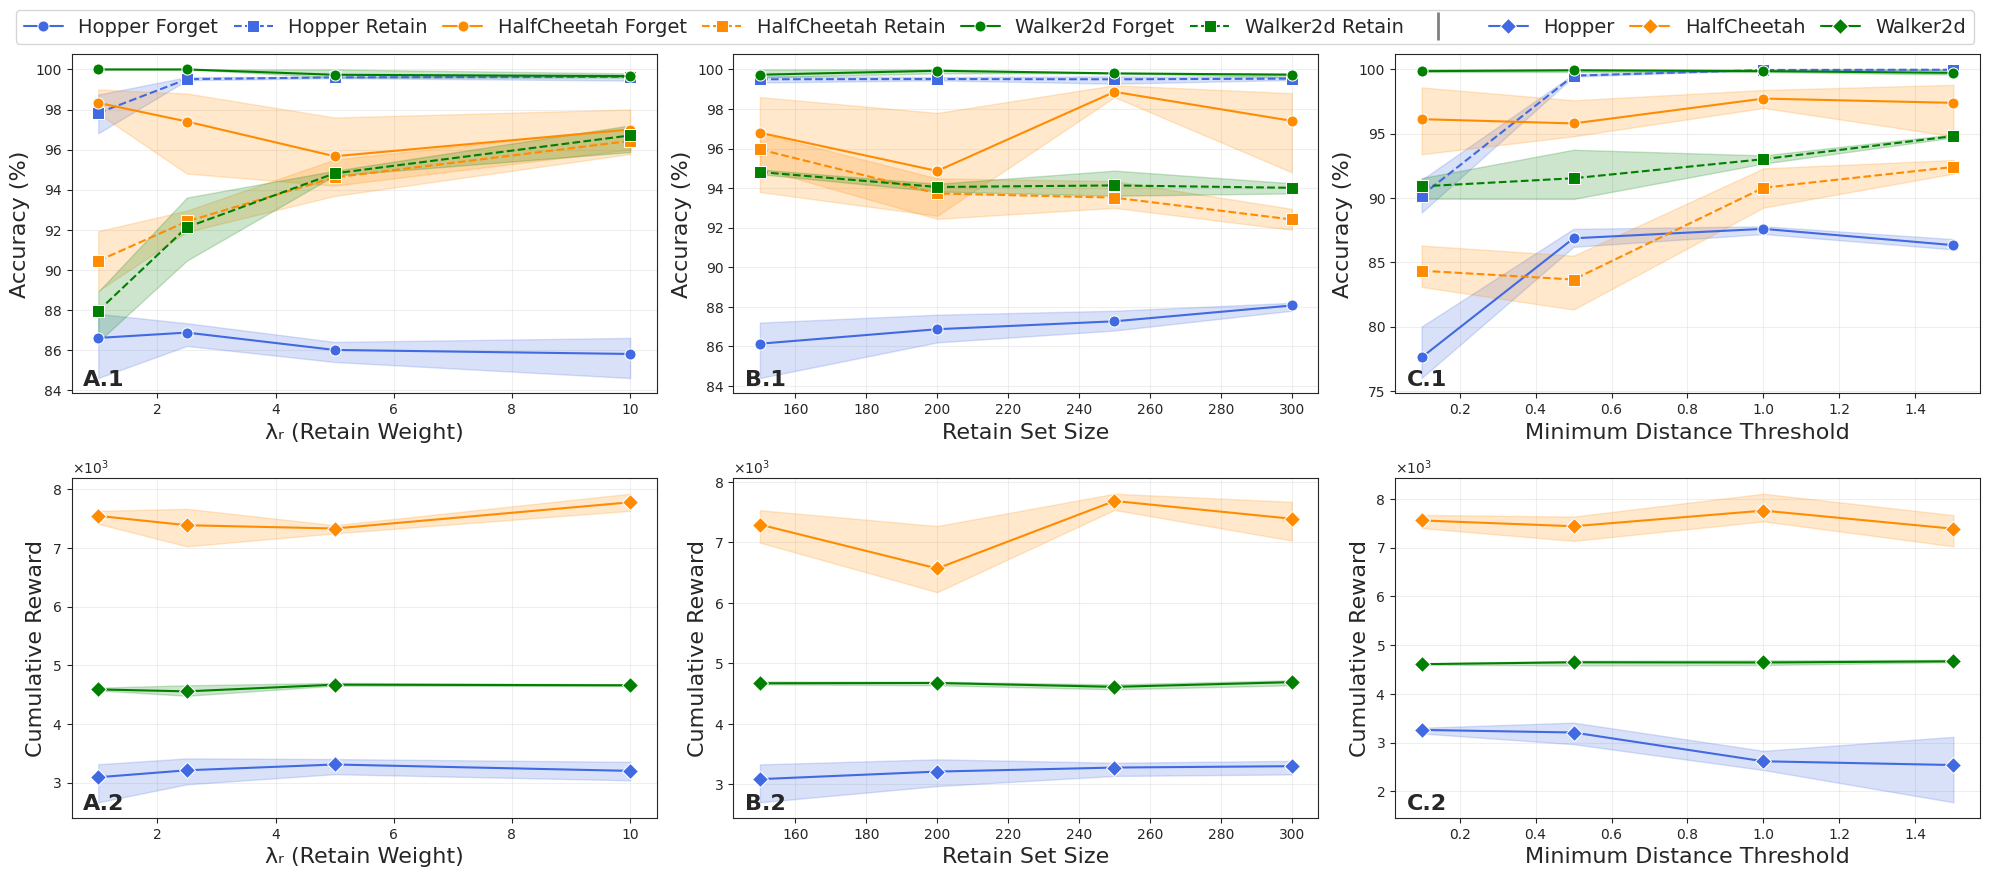

All ablation plots created successfully!


In [6]:


hopper_data = load_results('/home/microway/ManuelFabianoStuff/experiments/continuous_control/paper_exp/mujoco_td3/hopper-ablation_results.json')
halfcheetah_data = load_results('/home/microway/ManuelFabianoStuff/experiments/continuous_control/paper_exp/mujoco_td3/halfcheetah-ablation_results.json')
walker2d_data = load_results('/home/microway/ManuelFabianoStuff/experiments/continuous_control/paper_exp/mujoco_td3/walker2d-ablation_results.json')

# Debug: print unique parameter values
print("Debugging - Unique parameter values in Hopper data:")
lambda2_vals = set(r['hyperparams']['lambda2'] for r in hopper_data)
retain_vals = set(r['hyperparams']['retain'] for r in hopper_data)
retain_dim_vals = set(r['hyperparams']['retain_dim'] for r in hopper_data)
print(f"lambda2 values: {sorted(lambda2_vals)}")
print(f"retain (distance) values: {sorted(retain_vals)}")
print(f"retain_dim values: {sorted(retain_dim_vals)}")

# NOTE: Modify FIXED_PARAMS dictionary at the top of the file to adjust
# which parameters are fixed for each task in each ablation study

# Create all plots
#plot_lambda2_effect(hopper_data, halfcheetah_data, walker2d_data)
#plot_retain_size_effect(hopper_data, halfcheetah_data, walker2d_data)
#plot_distance_effect(hopper_data, halfcheetah_data, walker2d_data)

plot_all_ablations(hopper_data, halfcheetah_data, walker2d_data)

print("All ablation plots created successfully!")


In [57]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import pandas as pd
from scipy import stats
from matplotlib.ticker import ScalarFormatter
from matplotlib.lines import Line2D

# Set style
sns.set_style("ticks")

# Color palette
ENV_PALETTE = {'Hopper': 'royalblue', 'HalfCheetah': 'darkorange', 'Walker2d': 'green'}

# Configuration for fixed parameters per task
FIXED_PARAMS = {
    'hopper': {
        'lambda2_study': {'lambda1': 1, 'retain': 0.5, 'retain_dim': 200},
        'retain_size_study': {'lambda1': 1, 'lambda2': 2.5, 'retain': 0.5},
        'distance_study': {'lambda1': 1, 'lambda2': 2.5, 'retain_dim': 200}
    },
    'halfcheetah': {
        'lambda2_study': {'lambda1': 1, 'retain': 1.5, 'retain_dim': 300},
        'retain_size_study': {'lambda1': 1, 'lambda2': 2.5, 'retain': 1.5},
        'distance_study': {'lambda1': 1, 'lambda2': 2.5, 'retain_dim': 300}
    },
    'walker2d': {
        'lambda2_study': {'lambda1': 1, 'retain': 1.5, 'retain_dim': 150},
        'retain_size_study': {'lambda1': 1, 'lambda2': 5, 'retain': 1.5},
        'distance_study': {'lambda1': 1, 'lambda2': 5, 'retain_dim': 150}
    }
}

def load_results(filepath):
    """Load experimental results from JSON file"""
    with open(filepath, 'r') as f:
        return json.load(f)

def aggregate_by_param(data, param_name, fixed_params=None):
    """Aggregate results by a specific parameter"""
    results = defaultdict(list)
    
    for result in data:
        hp = result['hyperparams']
        
        # Check if fixed parameters match (if specified)
        if fixed_params:
            skip = False
            for key, val in fixed_params.items():
                if hp[key] != val:
                    skip = True
                    break
            if skip:
                continue
        
        # Get parameter value based on param_name
        param_val = hp[param_name]
        
        # Store metrics
        results[param_val].append({
            'forget_acc': result['metrics1']['forget_accuracy'],
            'retain_acc': result['metrics1']['retain_accuracy'],
            'reward': result['metrics2']['mean']
        })
    
    return results

def prepare_dataframe_for_accuracies(results_dict, env_name):
    """Prepare dataframe for accuracy plotting (forget and retain together)"""
    data_list = []
    
    for param_val, runs in results_dict.items():
        for run in runs:
            # Add forget accuracy
            data_list.append({
                'param_value': param_val,
                'accuracy': run['forget_acc'],
                'accuracy_type': 'Forget',
                'env': env_name
            })
            # Add retain accuracy
            data_list.append({
                'param_value': param_val,
                'accuracy': run['retain_acc'],
                'accuracy_type': 'Retain',
                'env': env_name
            })
    
    return pd.DataFrame(data_list)

def prepare_dataframe_for_reward(results_dict, env_name):
    """Prepare dataframe for reward plotting"""
    data_list = []
    
    for param_val, runs in results_dict.items():
        for run in runs:
            data_list.append({
                'param_value': param_val,
                'reward': run['reward'],
                'env': env_name
            })
    
    return pd.DataFrame(data_list)


def plot_lambda2_effect(hopper_data, halfcheetah_data, walker2d_data=None):
    """Plot effect of lambda2 (retain weight) on accuracies and reward"""
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))
    
    # Prepare datasets
    datasets = [
        (hopper_data, 'Hopper'),
        (halfcheetah_data, 'HalfCheetah')
    ]
    if walker2d_data is not None:
        datasets.append((walker2d_data, 'Walker2d'))
    
    # Aggregate data
    all_acc_dfs = []
    all_reward_dfs = []
    
    for data, env_name in datasets:
        results = aggregate_by_param(data, 'lambda2', 
                                     FIXED_PARAMS[env_name.lower()]['lambda2_study'])
        acc_df = prepare_dataframe_for_accuracies(results, env_name)
        reward_df = prepare_dataframe_for_reward(results, env_name)
        all_acc_dfs.append(acc_df)
        all_reward_dfs.append(reward_df)
    
    combined_acc_df = pd.concat(all_acc_dfs, ignore_index=True)
    combined_reward_df = pd.concat(all_reward_dfs, ignore_index=True)
    
    # Plot 1: Accuracies
    ax1 = axes[0]
    accuracy_handles = []
    accuracy_labels = []
    
    for env in combined_acc_df['env'].unique():
        env_data = combined_acc_df[combined_acc_df['env'] == env]
        forget_data = env_data[env_data['accuracy_type'] == 'Forget']
        retain_data = env_data[env_data['accuracy_type'] == 'Retain']
        
        line1 = sns.lineplot(data=forget_data, x='param_value', y='accuracy', 
                    color=ENV_PALETTE[env], marker='o', markersize=12, 
                    label=f'{env} Forget', ax=ax1, err_style="band", errorbar=('ci', 95))
        line2 = sns.lineplot(data=retain_data, x='param_value', y='accuracy', 
                    color=ENV_PALETTE[env], marker='s', markersize=12, 
                    label=f'{env} Retain', ax=ax1, err_style="band", 
                    errorbar=('ci', 95), linestyle='--')
    
    handles, labels = ax1.get_legend_handles_labels()
    accuracy_handles = handles
    accuracy_labels = labels
    ax1.get_legend().remove()
    
    ax1.set_xlabel('λᵣ (Retain Weight)', fontsize=22)
    ax1.set_ylabel('Accuracy (%)', fontsize=22)
    ax1.grid(True, alpha=0.3)
    ax1.tick_params(labelsize=16)
    
    # Plot 2: Reward
    ax2 = axes[1]
    sns.lineplot(data=combined_reward_df, x='param_value', y='reward', hue='env',
                 marker='D', markersize=12, ax=ax2, palette=ENV_PALETTE,
                 err_style="band", errorbar=('ci', 95))
    
    handles, labels = ax2.get_legend_handles_labels()
    reward_handles = handles
    reward_labels = labels
    ax2.get_legend().remove()
    
    ax2.set_xlabel('λᵣ (Retain Weight)', fontsize=22)
    ax2.set_ylabel('Cumulative Reward', fontsize=22)
    ax2.grid(True, alpha=0.3)
    ax2.tick_params(labelsize=16)
    ax2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax2.ticklabel_format(style='sci', axis='y', scilimits=(3,3))
    
    # Create shared legend
    vertical_separator = Line2D([0], [0], color='gray', marker='|', 
                               markersize=20, markeredgewidth=2, 
                               linestyle='None', label='')
    
    all_handles = accuracy_handles + [vertical_separator] + reward_handles
    all_labels = accuracy_labels + [''] + reward_labels
    
    fig.legend(all_handles, all_labels, 
               loc='upper center', bbox_to_anchor=(0.5, 0.98),
               ncol=len(all_handles), frameon=True, fontsize=16,
               columnspacing=0.6, handlelength=1.0)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.86, wspace=0.12)
    
    plt.savefig('lambda2_effect.pdf', dpi=300, bbox_inches='tight')
    plt.show()


def plot_retain_size_effect(hopper_data, halfcheetah_data, walker2d_data=None):
    """Plot effect of retain set size on accuracies and reward"""
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))
    
    # Prepare datasets
    datasets = [
        (hopper_data, 'Hopper'),
        (halfcheetah_data, 'HalfCheetah')
    ]
    if walker2d_data is not None:
        datasets.append((walker2d_data, 'Walker2d'))
    
    # Aggregate data
    all_acc_dfs = []
    all_reward_dfs = []
    
    for data, env_name in datasets:
        results = aggregate_by_param(data, 'retain_dim', 
                                     FIXED_PARAMS[env_name.lower()]['retain_size_study'])
        acc_df = prepare_dataframe_for_accuracies(results, env_name)
        reward_df = prepare_dataframe_for_reward(results, env_name)
        all_acc_dfs.append(acc_df)
        all_reward_dfs.append(reward_df)
    
    combined_acc_df = pd.concat(all_acc_dfs, ignore_index=True)
    combined_reward_df = pd.concat(all_reward_dfs, ignore_index=True)
    
    # Plot 1: Accuracies
    ax1 = axes[0]
    accuracy_handles = []
    accuracy_labels = []
    
    for env in combined_acc_df['env'].unique():
        env_data = combined_acc_df[combined_acc_df['env'] == env]
        forget_data = env_data[env_data['accuracy_type'] == 'Forget']
        retain_data = env_data[env_data['accuracy_type'] == 'Retain']
        
        sns.lineplot(data=forget_data, x='param_value', y='accuracy', 
                    color=ENV_PALETTE[env], marker='o', markersize=12, 
                    label=f'{env} Forget', ax=ax1, err_style="band", errorbar=('ci', 95))
        sns.lineplot(data=retain_data, x='param_value', y='accuracy', 
                    color=ENV_PALETTE[env], marker='s', markersize=12, 
                    label=f'{env} Retain', ax=ax1, err_style="band", 
                    errorbar=('ci', 95), linestyle='--')
    
    handles, labels = ax1.get_legend_handles_labels()
    accuracy_handles = handles
    accuracy_labels = labels
    ax1.get_legend().remove()
    
    ax1.set_xlabel('Retain Set Size', fontsize=22)
    ax1.set_ylabel('Accuracy (%)', fontsize=22)
    ax1.xaxis.set_major_formatter(ScalarFormatter())
    ax1.ticklabel_format(style='plain', axis='x')
    ax1.grid(True, alpha=0.3)
    ax1.tick_params(labelsize=16)
    
    # Plot 2: Reward
    ax2 = axes[1]
    sns.lineplot(data=combined_reward_df, x='param_value', y='reward', hue='env',
                 marker='D', markersize=12, ax=ax2, palette=ENV_PALETTE,
                 err_style="band", errorbar=('ci', 95))
    
    handles, labels = ax2.get_legend_handles_labels()
    reward_handles = handles
    reward_labels = labels
    ax2.get_legend().remove()
    
    ax2.set_xlabel('Retain Set Size', fontsize=22)
    ax2.set_ylabel('Cumulative Reward', fontsize=22)
    ax2.xaxis.set_major_formatter(ScalarFormatter())
    ax2.ticklabel_format(style='plain', axis='x')
    ax2.grid(True, alpha=0.3)
    ax2.tick_params(labelsize=16)
    ax2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax2.ticklabel_format(style='sci', axis='y', scilimits=(3,3))
    
    # Create shared legend
    vertical_separator = Line2D([0], [0], color='gray', marker='|', 
                               markersize=20, markeredgewidth=2, 
                               linestyle='None', label='')
    
    all_handles = accuracy_handles + [vertical_separator] + reward_handles
    all_labels = accuracy_labels + [''] + reward_labels
    
    fig.legend(all_handles, all_labels, 
               loc='upper center', bbox_to_anchor=(0.5, 0.98),
               ncol=len(all_handles), frameon=True, fontsize=16,
               columnspacing=0.6, handlelength=1.0)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.86, wspace=0.12)
    plt.savefig('retain_size_effect.pdf', dpi=300, bbox_inches='tight')
    plt.show()



def plot_distance_effect(hopper_data, halfcheetah_data, walker2d_data=None):
    """Plot effect of minimum distance threshold on accuracies and reward"""
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))
    
    # Prepare datasets
    datasets = [
        (hopper_data, 'Hopper'),
        (halfcheetah_data, 'HalfCheetah')
    ]
    if walker2d_data is not None:
        datasets.append((walker2d_data, 'Walker2d'))
    
    # Aggregate data
    all_acc_dfs = []
    all_reward_dfs = []
    
    for data, env_name in datasets:
        results = aggregate_by_param(data, 'retain', 
                                     FIXED_PARAMS[env_name.lower()]['distance_study'])
        acc_df = prepare_dataframe_for_accuracies(results, env_name)
        reward_df = prepare_dataframe_for_reward(results, env_name)
        all_acc_dfs.append(acc_df)
        all_reward_dfs.append(reward_df)
    
    combined_acc_df = pd.concat(all_acc_dfs, ignore_index=True)
    combined_reward_df = pd.concat(all_reward_dfs, ignore_index=True)
    
    # Plot 1: Accuracies
    ax1 = axes[0]
    accuracy_handles = []
    accuracy_labels = []
    
    for env in combined_acc_df['env'].unique():
        env_data = combined_acc_df[combined_acc_df['env'] == env]
        forget_data = env_data[env_data['accuracy_type'] == 'Forget']
        retain_data = env_data[env_data['accuracy_type'] == 'Retain']
        
        sns.lineplot(data=forget_data, x='param_value', y='accuracy', 
                    color=ENV_PALETTE[env], marker='o', markersize=12, 
                    label=f'{env} Forget', ax=ax1, err_style="band", errorbar=('ci', 95))
        sns.lineplot(data=retain_data, x='param_value', y='accuracy', 
                    color=ENV_PALETTE[env], marker='s', markersize=12, 
                    label=f'{env} Retain', ax=ax1, err_style="band", 
                    errorbar=('ci', 95), linestyle='--')
    
    handles, labels = ax1.get_legend_handles_labels()
    accuracy_handles = handles
    accuracy_labels = labels
    ax1.get_legend().remove()
    
    ax1.set_xlabel('Minimum Distance Threshold', fontsize=20)
    ax1.set_ylabel('Accuracy (%)', fontsize=20)
    ax1.grid(True, alpha=0.3)
    ax1.tick_params(labelsize=16)
    
    # Plot 2: Reward
    ax2 = axes[1]
    sns.lineplot(data=combined_reward_df, x='param_value', y='reward', hue='env',
                 marker='D', markersize=12, ax=ax2, palette=ENV_PALETTE,
                 err_style="band", errorbar=('ci', 95))
    
    handles, labels = ax2.get_legend_handles_labels()
    reward_handles = handles
    reward_labels = labels
    ax2.get_legend().remove()
    
    ax2.set_xlabel('Minimum Distance Threshold', fontsize=22)
    ax2.set_ylabel('Cumulative Reward', fontsize=22)
    ax2.grid(True, alpha=0.3)
    ax2.tick_params(labelsize=16)
    ax2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax2.ticklabel_format(style='sci', axis='y', scilimits=(3,3))
    
    # Create shared legend
    # Create shared legend
    vertical_separator = Line2D([0], [0], color='gray', marker='|', 
                               markersize=20, markeredgewidth=2, 
                               linestyle='None', label='')
    
    all_handles = accuracy_handles + [vertical_separator] + reward_handles
    all_labels = accuracy_labels + [''] + reward_labels
    
    fig.legend(all_handles, all_labels, 
               loc='upper center', bbox_to_anchor=(0.5, 0.98),
               ncol=len(all_handles), frameon=True, fontsize=16,
               columnspacing=0.6, handlelength=1.0)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.86, wspace=0.12)
    plt.savefig('distance_effect.pdf', dpi=300, bbox_inches='tight')
    plt.show()


    

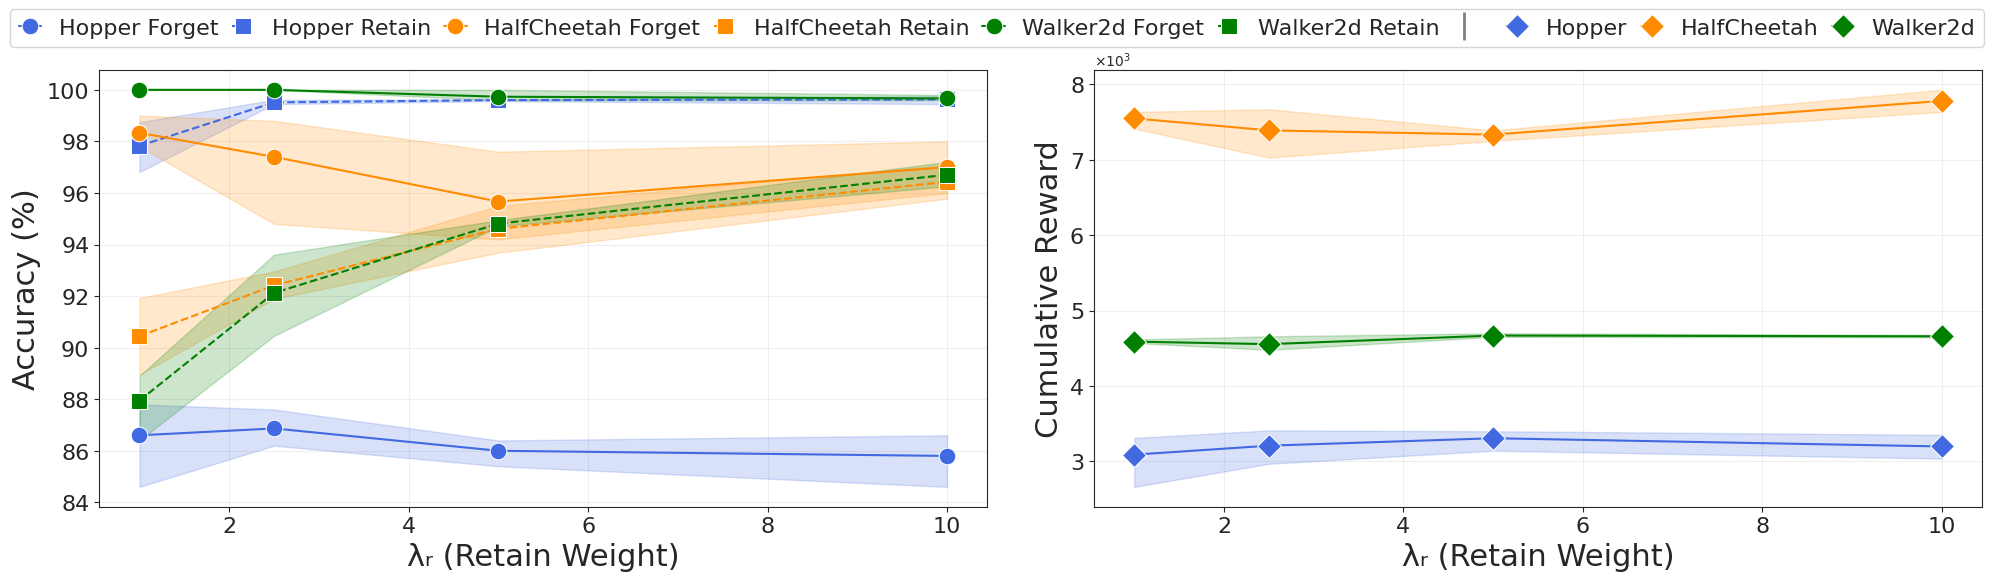

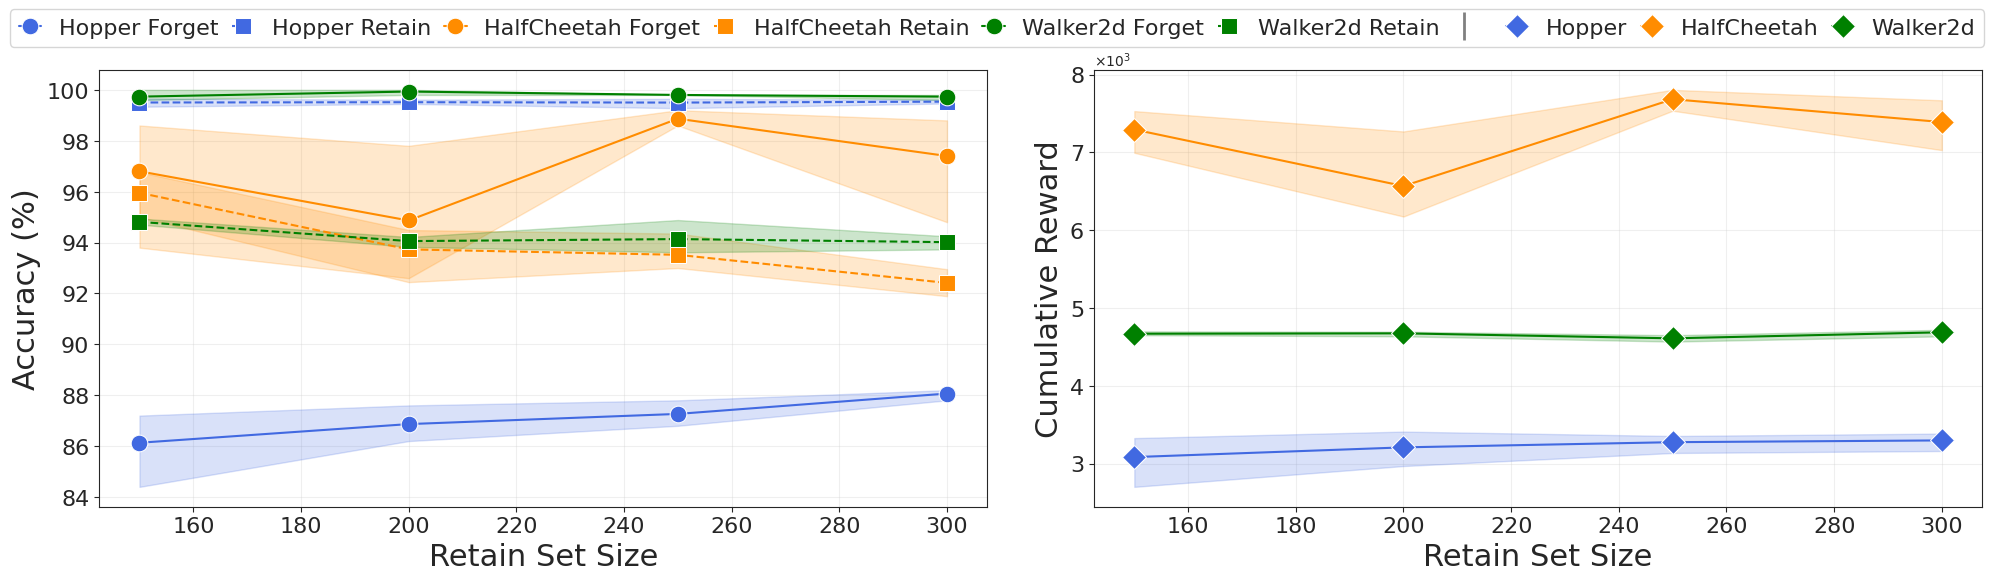

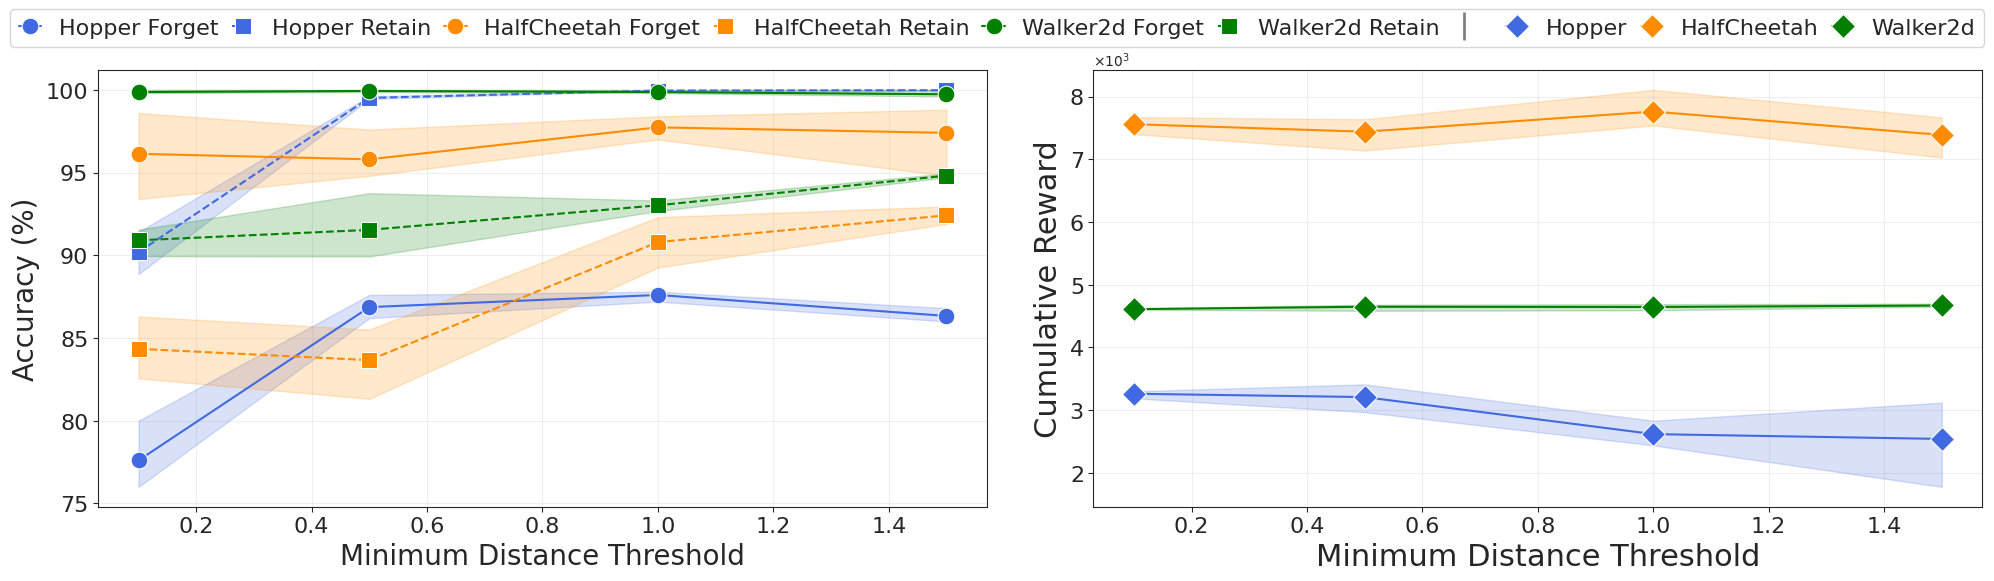

In [58]:
# Plot individual ablations
plot_lambda2_effect(hopper_data, halfcheetah_data, walker2d_data)
plot_retain_size_effect(hopper_data, halfcheetah_data, walker2d_data)
plot_distance_effect(hopper_data, halfcheetah_data, walker2d_data)

In [40]:
import pandas as pd
from pathlib import Path

root = Path("/home/microway/ManuelFabianoStuff/code/results")

ENV = ["mujoco", "atari"]
TASKS = ["walker2d", "spaceinvaders"]
ALGS  = ["td3", "sac", "ppo", "dqn"]

frames = []
for env in ENV:
    for alg in ALGS:
        for task in TASKS:
            csv = root / f"{env}/{alg}/{task}.csv"
            try: 
                df  = pd.read_csv(csv)
                df["Algorithm"] = alg.upper()
                df["Task"]      = task.title()
                frames.append(df)
            except:
                pass

full = pd.concat(frames, ignore_index=True)

full["avg_retain_target_mean_distance"] = (1 - full["avg_retain_target_mean_distance"]) * 100
full["avg_forget_target_mean_distance"] = (1 - full["avg_forget_target_mean_distance"]) * 100

pivot_len = (
    full
    .pivot_table(
        index=["traj_len", "Task"],
        columns="Algorithm",
        values=["avg_retain_target_mean_distance", "avg_forget_target_mean_distance", "returns_mean", "returns_ci"]
    )
    .sort_index(level=0)  
)

# visualizzazione
pivot_len.style.format("{:.2f}%")

In [42]:
pivot_len.to_csv('opposite_proportional.csv')

In [34]:
root = Path("/home/microway/ManuelFabianoStuff/code/algos")

TYPE = ["random", "uniform"]
TASKS = ["walker2d", "spaceinvaders"]
ALGS  = ["td3", "sac", "ppo-mujoco" ,"ppo-atari", "dqn"]

frames = []
for type in TYPE:
    for alg in ALGS:
        for task in TASKS:
            csv = root / f"{alg}/{task}_{type}.csv"
          
            try: 
                df  = pd.read_csv(csv)
                df["Algorithm"] = alg.upper()
                df["Task"]      = task.title()
                frames.append(df)
            except:
                pass

full = pd.concat(frames, ignore_index=True)

full["avg_retain_target_mean_distance"] = (1 - full["avg_retain_target_mean_distance"]) * 100
full["avg_forget_target_mean_distance"] = (1 - full["avg_forget_target_mean_distance"]) * 100

pivot_len = (
    full
    .pivot_table(
        index=["traj_len", "Task"],
        columns="Algorithm",
        values=["avg_retain_target_mean_distance", "avg_forget_target_mean_distance", "returns_mean", "returns_ci"]
    )
    .sort_index(level=0)  
)

# visualizzazione
pivot_len.style.format("{:.2f}%")

In [36]:
pivot_len.to_csv('random_uniform.csv')

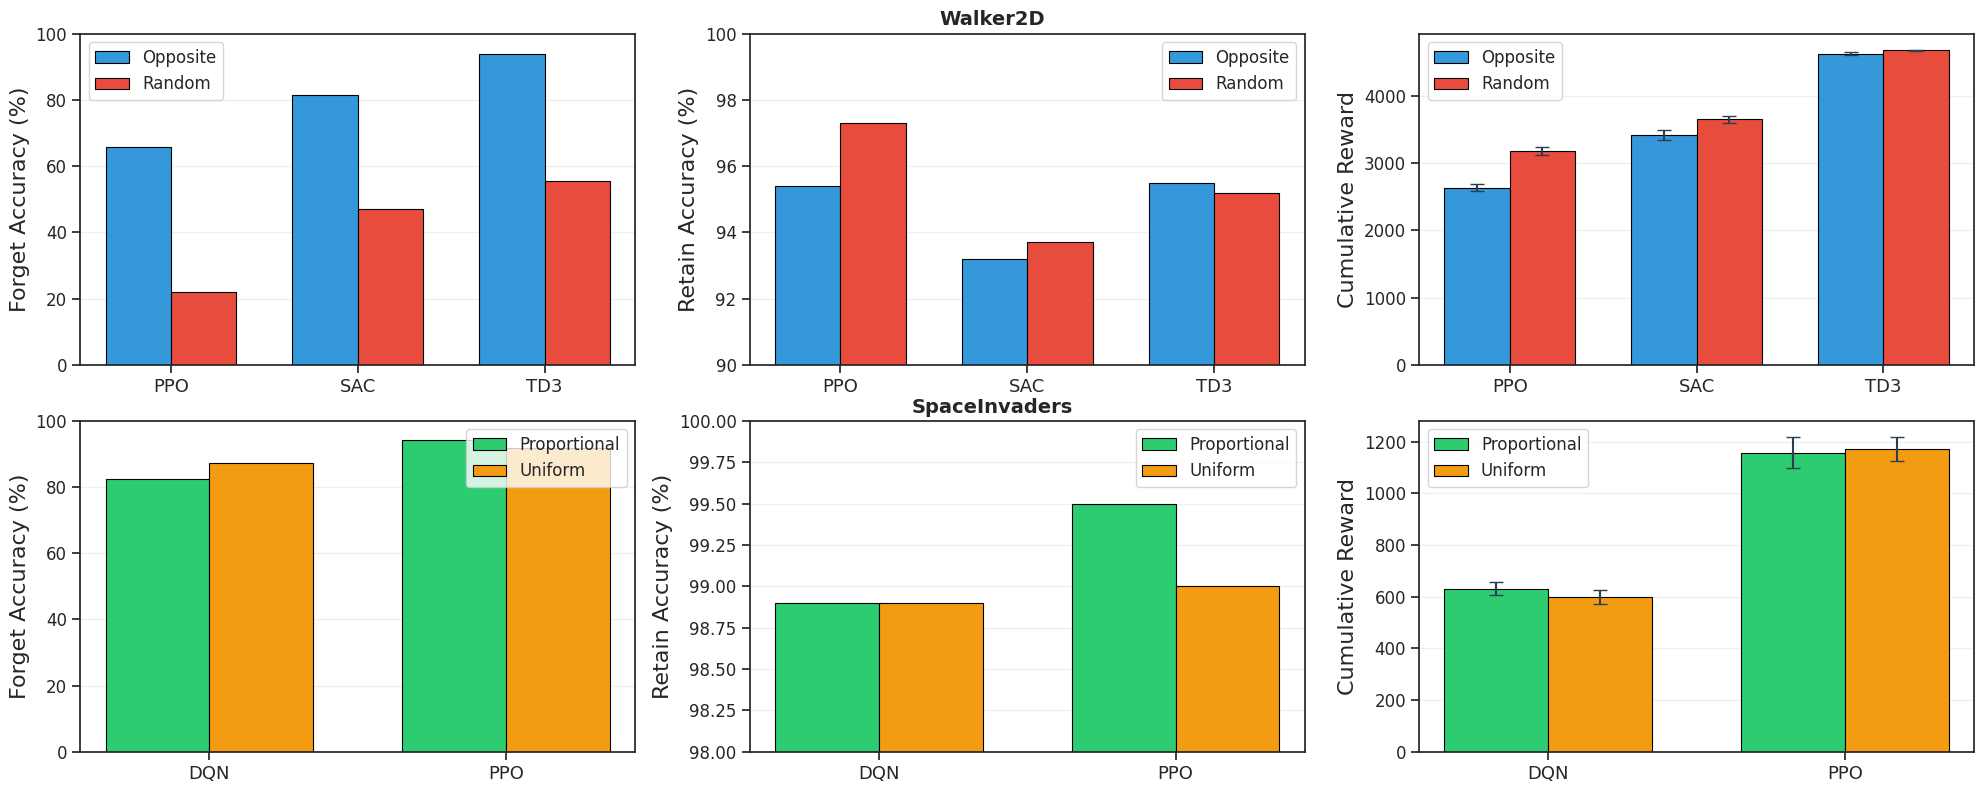

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set_theme(style="ticks")

# Walker2D data (Opposite vs Random)
walker_algos = ['PPO', 'SAC', 'TD3']

walker_forget_opp = [65.8, 81.5, 94.0]
walker_forget_rand = [22.1, 47.1, 55.6]

walker_retain_opp = [95.4, 93.2, 95.5]
walker_retain_rand = [97.3, 93.7, 95.2]

walker_reward_opp = [2635, 3421, 4630]
walker_reward_rand = [3186, 3651, 4681]

# 95% Confidence intervals
walker_ci_opp = [50.8, 73.1, 20.6]
walker_ci_rand = [59.7, 51.1, 5.7]

# SpaceInvaders data (Proportional vs Uniform)
si_algos = ['DQN', 'PPO']

si_forget_prop = [82.6, 94.2]
si_forget_unif = [87.2, 91.9]

si_retain_prop = [98.9, 99.5]
si_retain_unif = [98.9, 99.0]

si_reward_prop = [631, 1157]
si_reward_unif = [599, 1172]

# 95% Confidence intervals
si_ci_prop = [24.1, 59.2]
si_ci_unif = [26.1, 46.7]

# Create figure
fig, axes = plt.subplots(2, 3, figsize=(20, 8))



x_walker = np.arange(len(walker_algos))
x_si = np.arange(len(si_algos))
width = 0.35

# ========== WALKER2D ROW ==========
# Forget Accuracy
axes[0, 0].bar(x_walker - width/2, walker_forget_opp, width, 
               label='Opposite', color='#3498db', edgecolor='black', linewidth=0.8)
axes[0, 0].bar(x_walker + width/2, walker_forget_rand, width, 
               label='Random', color='#e74c3c', edgecolor='black', linewidth=0.8)
axes[0, 0].set_ylabel('Forget Accuracy (%)', fontsize=16)
axes[0, 0].set_xticks(x_walker)
axes[0, 0].set_xticklabels(walker_algos, fontsize=13)
axes[0, 0].legend(fontsize=12, frameon=True)
axes[0, 0].set_ylim([0, 100])
axes[0, 0].tick_params(axis='y', labelsize=12)

# Retain Accuracy
axes[0, 1].bar(x_walker - width/2, walker_retain_opp, width, 
               label='Opposite', color='#3498db', edgecolor='black', linewidth=0.8)
axes[0, 1].bar(x_walker + width/2, walker_retain_rand, width, 
               label='Random', color='#e74c3c', edgecolor='black', linewidth=0.8)
axes[0, 1].set_ylabel('Retain Accuracy (%)', fontsize=16)
axes[0, 1].set_xticks(x_walker)
axes[0, 1].set_xticklabels(walker_algos, fontsize=13)
axes[0, 1].legend(fontsize=12, frameon=True)
axes[0, 1].set_ylim([90, 100])
axes[0, 1].tick_params(axis='y', labelsize=12)

# Cumulative Reward with error bars for BOTH methods
axes[0, 2].bar(x_walker - width/2, walker_reward_opp, width, 
               label='Opposite', color='#3498db', edgecolor='black', linewidth=0.8,
               yerr=walker_ci_opp, capsize=5, error_kw={'linewidth': 1.5, 'ecolor': '#2c3e50'})
axes[0, 2].bar(x_walker + width/2, walker_reward_rand, width, 
               label='Random', color='#e74c3c', edgecolor='black', linewidth=0.8,
               yerr=walker_ci_rand, capsize=5, error_kw={'linewidth': 1.5, 'ecolor': '#2c3e50'})
axes[0, 2].set_ylabel('Cumulative Reward', fontsize=16)
axes[0, 2].set_xticks(x_walker)
axes[0, 2].set_xticklabels(walker_algos, fontsize=13)
axes[0, 2].legend(fontsize=12, frameon=True)
axes[0, 2].tick_params(axis='y', labelsize=12)

# ========== SPACEINVADERS ROW ==========
# Forget Accuracy
axes[1, 0].bar(x_si - width/2, si_forget_prop, width, 
               label='Proportional', color='#2ecc71', edgecolor='black', linewidth=0.8)
axes[1, 0].bar(x_si + width/2, si_forget_unif, width, 
               label='Uniform', color='#f39c12', edgecolor='black', linewidth=0.8)
axes[1, 0].set_ylabel('Forget Accuracy (%)', fontsize=16)
axes[1, 0].set_xticks(x_si)
axes[1, 0].set_xticklabels(si_algos, fontsize=13)
axes[1, 0].legend(fontsize=12, frameon=True)
axes[1, 0].set_ylim([0, 100])
axes[1, 0].tick_params(axis='y', labelsize=12)

# Retain Accuracy
axes[1, 1].bar(x_si - width/2, si_retain_prop, width, 
               label='Proportional', color='#2ecc71', edgecolor='black', linewidth=0.8)
axes[1, 1].bar(x_si + width/2, si_retain_unif, width, 
               label='Uniform', color='#f39c12', edgecolor='black', linewidth=0.8)
axes[1, 1].set_ylabel('Retain Accuracy (%)', fontsize=16)
axes[1, 1].set_xticks(x_si)
axes[1, 1].set_xticklabels(si_algos, fontsize=13)
axes[1, 1].legend(fontsize=12, frameon=True)
axes[1, 1].set_ylim([98, 100])
axes[1, 1].tick_params(axis='y', labelsize=12)

# Cumulative Reward with error bars for BOTH methods
axes[1, 2].bar(x_si - width/2, si_reward_prop, width, 
               label='Proportional', color='#2ecc71', edgecolor='black', linewidth=0.8,
               yerr=si_ci_prop, capsize=5, error_kw={'linewidth': 1.5, 'ecolor': '#2c3e50'})
axes[1, 2].bar(x_si + width/2, si_reward_unif, width, 
               label='Uniform', color='#f39c12', edgecolor='black', linewidth=0.8,
               yerr=si_ci_unif, capsize=5, error_kw={'linewidth': 1.5, 'ecolor': '#2c3e50'})
axes[1, 2].set_ylabel('Cumulative Reward', fontsize=16)
axes[1, 2].set_xticks(x_si)
axes[1, 2].set_xticklabels(si_algos, fontsize=13)
axes[1, 2].legend(fontsize=12, frameon=True)
axes[1, 2].tick_params(axis='y', labelsize=12)

# Apply grid and despine to all subplots
for ax in axes.flat:
    ax.grid(True, axis='y', alpha=0.3)
    ax.grid(False, axis='x')
    ax.set_axisbelow(True)
    sns.despine(ax=ax, top=False, right=False)

plt.tight_layout(rect=[0, 0, 1, 0.99])
# Add row titles
fig.text(0.5, 0.97, 'Walker2D', ha='center', fontsize=14, fontweight='bold')
fig.text(0.5, 0.485, 'SpaceInvaders', ha='center', fontsize=14, fontweight='bold')
plt.savefig('target_method_comparison.pdf', format='pdf', bbox_inches='tight', dpi=300)
plt.show()


In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set_theme(style="ticks")

# ========== WALKER2D PLOTS ==========

def plot_walker2d_forget():
    """Walker2D: Forget Accuracy"""
    algos = ['PPO', 'SAC', 'TD3']
    forget_opp = [65.8, 81.5, 94.0]
    forget_rand = [22.1, 47.1, 55.6]
    
    fig, ax = plt.subplots(figsize=(6, 5))
    x = np.arange(len(algos))
    width = 0.35
    
    ax.bar(x - width/2, forget_opp, width, label='Opposite', color='#3498db')
    ax.bar(x + width/2, forget_rand, width, label='Random', color='#e74c3c')
    ax.set_ylabel('Forget Accuracy (%)', fontsize=16)
    ax.set_xticks(x)
    ax.set_xticklabels(algos, fontsize=14)
    ax.legend(fontsize=14, frameon=True)
    ax.set_ylim([0, 100])
    ax.tick_params(axis='y', labelsize=12)
    ax.grid(True, axis='y', alpha=0.3)
    ax.grid(False, axis='x')
    ax.set_axisbelow(True)
    sns.despine(ax=ax, top=False, right=False)
    
    plt.tight_layout()
    plt.savefig('walker2d_forget.pdf', format='pdf', bbox_inches='tight', dpi=300)
    plt.show()
    plt.close()


def plot_walker2d_retain():
    """Walker2D: Retain Accuracy"""
    algos = ['PPO', 'SAC', 'TD3']
    retain_opp = [95.4, 93.2, 95.5]
    retain_rand = [97.3, 93.7, 95.2]
    
    fig, ax = plt.subplots(figsize=(6, 5))
    x = np.arange(len(algos))
    width = 0.35
    
    ax.bar(x - width/2, retain_opp, width, label='Opposite', color='#3498db')
    ax.bar(x + width/2, retain_rand, width, label='Random', color='#e74c3c')
    ax.set_ylabel('Retain Accuracy (%)', fontsize=16)
    ax.set_xticks(x)
    ax.set_xticklabels(algos, fontsize=14)
    ax.legend(fontsize=14, frameon=True)
    ax.set_ylim([90, 100])
    ax.tick_params(axis='y', labelsize=12)
    ax.grid(True, axis='y', alpha=0.3)
    ax.grid(False, axis='x')
    ax.set_axisbelow(True)
    sns.despine(ax=ax, top=False, right=False)
    
    plt.tight_layout()
    plt.savefig('walker2d_retain.pdf', format='pdf', bbox_inches='tight', dpi=300)
    plt.show()
    plt.close()


def plot_walker2d_reward():
    """Walker2D: Cumulative Reward"""
    algos = ['PPO', 'SAC', 'TD3']
    reward_opp = [2635, 3421, 4630]
    reward_rand = [3186, 3651, 4681]
    ci_opp = [50.8, 73.1, 20.6]
    ci_rand = [59.7, 51.1, 5.7]
    
    fig, ax = plt.subplots(figsize=(6, 5))
    x = np.arange(len(algos))
    width = 0.35
    
    ax.bar(x - width/2, reward_opp, width, 
           label='Opposite', color='#3498db',
           yerr=ci_opp, capsize=5, error_kw={'linewidth': 1.5, 'ecolor': '#2c3e50'})
    ax.bar(x + width/2, reward_rand, width, 
           label='Random', color='#e74c3c',
           yerr=ci_rand, capsize=5, error_kw={'linewidth': 1.5, 'ecolor': '#2c3e50'})
    ax.set_ylabel('Cumulative Reward', fontsize=16)
    ax.set_xticks(x)
    ax.set_xticklabels(algos, fontsize=14)
    ax.legend(fontsize=14, frameon=True)
    ax.tick_params(axis='y', labelsize=12)
    ax.grid(True, axis='y', alpha=0.3)
    ax.grid(False, axis='x')
    ax.set_axisbelow(True)
    sns.despine(ax=ax, top=False, right=False)
    
    plt.tight_layout()
    plt.savefig('walker2d_reward.pdf', format='pdf', bbox_inches='tight', dpi=300)
    plt.show()
    plt.close()


# ========== SPACEINVADERS PLOTS ==========

def plot_spaceinvaders_forget():
    """SpaceInvaders: Forget Accuracy"""
    algos = ['DQN', 'PPO']
    forget_prop = [82.6, 94.2]
    forget_unif = [87.2, 91.9]
    
    fig, ax = plt.subplots(figsize=(6, 5))
    x = np.arange(len(algos))
    width = 0.35
    
    ax.bar(x - width/2, forget_prop, width, label='Proportional', color='#2ecc71')
    ax.bar(x + width/2, forget_unif, width, label='Uniform', color='#f39c12')
    ax.set_ylabel('Forget Accuracy (%)', fontsize=16)
    ax.set_xticks(x)
    ax.set_xticklabels(algos, fontsize=14)
    ax.legend(fontsize=14, frameon=True)
    ax.set_ylim([0, 100])
    ax.tick_params(axis='y', labelsize=12)
    ax.grid(True, axis='y', alpha=0.3)
    ax.grid(False, axis='x')
    ax.set_axisbelow(True)
    sns.despine(ax=ax, top=False, right=False)
    
    plt.tight_layout()
    plt.savefig('spaceinvaders_forget.pdf', format='pdf', bbox_inches='tight', dpi=300)
    plt.show()
    plt.close()


def plot_spaceinvaders_retain():
    """SpaceInvaders: Retain Accuracy"""
    algos = ['DQN', 'PPO']
    retain_prop = [98.9, 99.5]
    retain_unif = [98.9, 99.0]
    
    fig, ax = plt.subplots(figsize=(6, 5))
    x = np.arange(len(algos))
    width = 0.35
    
    ax.bar(x - width/2, retain_prop, width, label='Proportional', color='#2ecc71')
    ax.bar(x + width/2, retain_unif, width, label='Uniform', color='#f39c12')
    ax.set_ylabel('Retain Accuracy (%)', fontsize=16)
    ax.set_xticks(x)
    ax.set_xticklabels(algos, fontsize=14)
    ax.legend(fontsize=14, frameon=True)
    ax.set_ylim([98.00, 100.00])
    ax.tick_params(axis='y', labelsize=12)
    ax.grid(True, axis='y', alpha=0.3)
    ax.grid(False, axis='x')
    ax.set_axisbelow(True)
    sns.despine(ax=ax, top=False, right=False)
    
    plt.tight_layout()
    plt.savefig('spaceinvaders_retain.pdf', format='pdf', bbox_inches='tight', dpi=300)
    plt.show()
    plt.close()


def plot_spaceinvaders_reward():
    """SpaceInvaders: Cumulative Reward"""
    algos = ['DQN', 'PPO']
    reward_prop = [631, 1157]
    reward_unif = [599, 1172]
    ci_prop = [24.1, 59.2]
    ci_unif = [26.1, 46.7]
    
    fig, ax = plt.subplots(figsize=(6, 5))
    x = np.arange(len(algos))
    width = 0.35
    
    ax.bar(x - width/2, reward_prop, width, 
           label='Proportional', color='#2ecc71',
           yerr=ci_prop, capsize=5, error_kw={'linewidth': 1.5, 'ecolor': '#2c3e50'})
    ax.bar(x + width/2, reward_unif, width, 
           label='Uniform', color='#f39c12',
           yerr=ci_unif, capsize=5, error_kw={'linewidth': 1.5, 'ecolor': '#2c3e50'})
    ax.set_ylabel('Cumulative Reward', fontsize=16)
    ax.set_xticks(x)
    ax.set_xticklabels(algos, fontsize=14)
    ax.legend(fontsize=14, frameon=True)
    ax.tick_params(axis='y', labelsize=12)
    ax.grid(True, axis='y', alpha=0.3)
    ax.grid(False, axis='x')
    ax.set_axisbelow(True)
    sns.despine(ax=ax, top=False, right=False)
    
    plt.tight_layout()
    plt.savefig('spaceinvaders_reward.pdf', format='pdf', bbox_inches='tight', dpi=300)
    plt.show()
    plt.close()


    # Walker2D plots



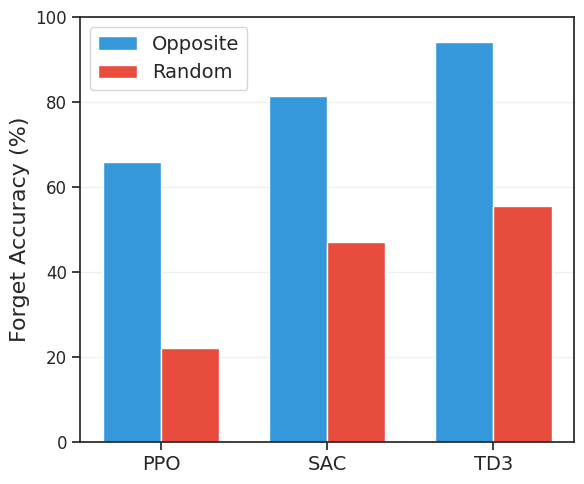

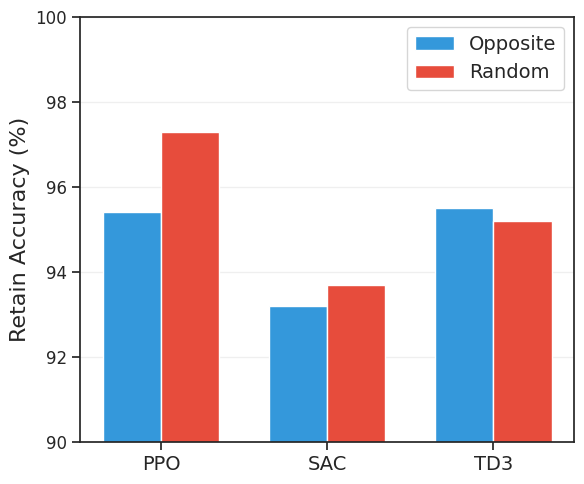

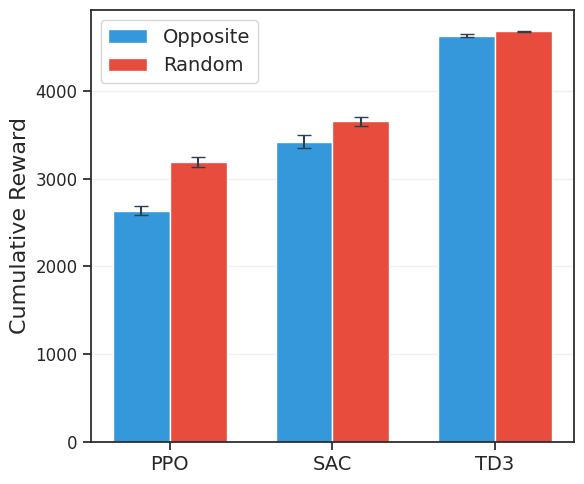

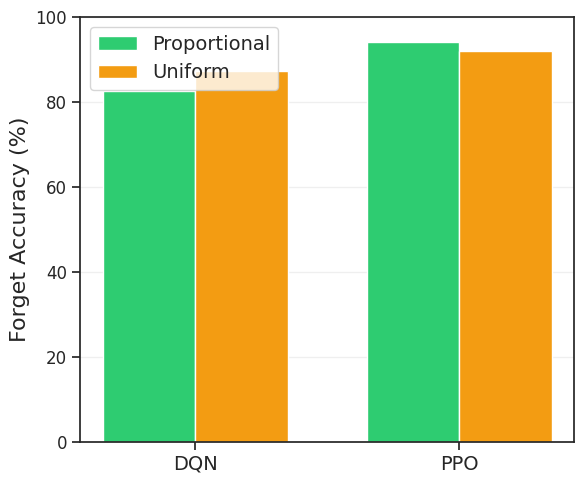

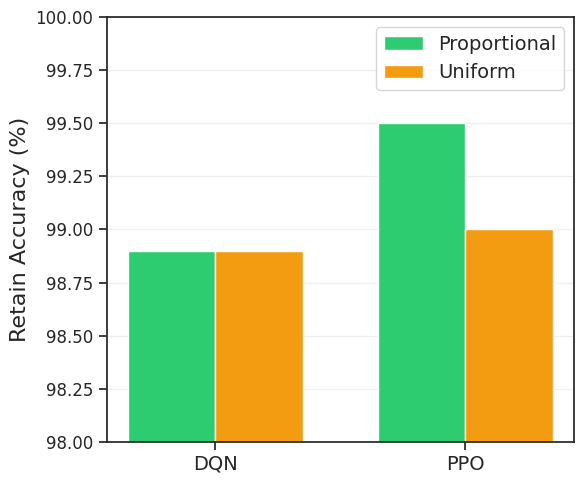

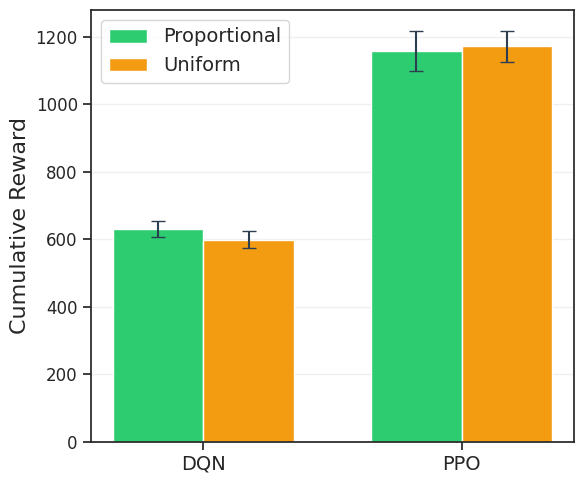

In [66]:
plot_walker2d_forget()
plot_walker2d_retain()
plot_walker2d_reward()
    
    # SpaceInvaders plots
plot_spaceinvaders_forget()
plot_spaceinvaders_retain()
plot_spaceinvaders_reward()
    